In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV





## Factors that influence US home prices:

The assignment utilizes Three primary datasets: Supply,Demand,Macroeconomic Factor. 
These datasets provide monthly data pertaining to crucial factors affecting national home prices in the United States.

The Entire concepts should be as follow- 

Some Stages like Feature Engineering can addressed in the respective Stage 

Data Collection: Gathering data from various sources, including government agencies, private datasets, real estate reports, and articles related to housing and real estate across different U.S. states. This comprehensive dataset encompasses diverse aspects such as GDP and unemployment data.

Statistical Analysis: Analyzing the collected data, performing data preprocessing, and applying exploratory data analysis (EDA) techniques. This step helps gain insights into the dataset, understand its characteristics, and identify patterns and trends.

Scaling: Applying Min-Max scaling to standardize the data and ensure consistency in the value ranges across different features. This preprocessing step is crucial for certain machine learning algorithms.

Model Building & Evaluation: Developing predictive models using various machine learning algorithms. The models are evaluated using performance metrics such as R-squared (R2) and Root Mean Square Error (RMSE) to assess their predictive accuracy.

Hyperparameter Tuning: Fine-tuning the models through hyperparameter optimization using techniques like grid search. This step aims to enhance the models' performance and make them more accurate in predicting housing-related trends

Prediction Insights: Offer insights into the predictions made by the models. Analyze how well the models capture real-world housing price fluctuations and their ability to provide accurate forecasts.

Future Work 

In [2]:
# As we need to Explain for the last twenty Years, We need information only between (2003-01-01  to 2023-06-30)
start_date = '2003-01-01'
end_date = '2023-06-30'

## Collection of Datasets -- by analsing various website

We can list out some of the features on analysing the supply and Demand along with some macroeconomic Factors 

1.Case_Schiller_Home_Price_Index-CSUSHPISA stands for the S&P/Case-Shiller U.S. National Home Price Index, which is adjusted for seasonal variations and uses a specific month as the base with an index value of 100. It serves as a representation of home prices in the United States.

2.Customer_sentiment-UMCSENT refers to the Consumer Sentiment Index provided by the University of Michigan. This index quantifies consumer sentiment through surveys conducted by the University of Michigan.

3.Interest_rate-INTDSRUSM193N signifies the interest rates or discount rates for the United States, measured in billions of dollars and seasonally adjusted at an annual rate.

4.Mortgage_rate-MORTGAGE15US: 30-Year Fixed Rate Mortgage Average in the United States (Percent, Not Seasonally Adjusted). It indicates the average interest rate for a 30-year fixed-rate mortgage

5.House_Hold_Rate:MSPUS: Median Sales Price of Houses Sold for the United States (Not Seasonally Adjusted)

6.GDP: Gross Domestic Product (Billions of Dollars, Seasonally Adjusted Annual Rate)

7.Global price Index-Price indices serve as a statistical tool used to facilitate comparisons of price trends across various time periods or geographical regions. These indices have multiple practical applications. In the case of extensive indices, they can be used to gauge the overall price level or the cost of living within an economy.

8.Recession probability-Recession probability  traditionally rely on the term spread, but their reliability can be compromised by near-zero short-term interest rates. Institutional constraints limit how far long-term yields can go negative, potentially reducing the accuracy of yield curve inversion signals during economic downturns. Augmenting such models with two additional predictive variables enhances their ability to estimate recession probabilities.

9.Unemployment rate-The unemployment rate represents the proportion of the workforce actively seeking employment.

10.housing_Inventory_Estimate-EVACANTUSQ176N: United States Housing Inventory Estimate - Vacant Housing Units (Thousands of Units, Not Adjusted for Seasonal Variations). This metric offers an estimation of the quantity of unoccupied residential units in the United States.

11.Monthly New Home Supply-MSACSR: United States Monthly New Home Supply (Seasonally Adjusted). This metric reflects the monthly availability of newly constructed homes in the United States.

12.PERMIT: New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units (Thousands of Units, Seasonally Adjusted Annual Rate). This variable represents the number of new housing units authorized for construction in permit-issuing places

13.Construction_Spending-TLRESCONS: Aggregate Residential Construction Expenditure in the United States (Millions of Dollars, Seasonally Adjusted Annual Rate). This figure signifies the overall spending on residential construction projects.

14.NASDAQ-National Association of Securities Dealers Automated Quotations, is a prominent American stock exchange specializing in electronic trading of securities on a global scale. NASDAQ was established by the National Association of Securities Dealers (NASD) and is overseen by the Securities and Exchange Commission (SEC).



## Case_Schiller_Home_Price_Index

CSUSHPISA stands for the S&P/Case-Shiller U.S. National Home Price Index, which is adjusted for seasonal variations and uses a specific month as the base with an index value of 100. It serves as a representation of home prices in the United States.

In [3]:
df_Case_Schiller_Home_Price_Index=pd.read_csv('/Users/vallirajasekar/Desktop/US_HOME_PRICE/Datasets/Demand/CSUSHPISA.csv')

In [4]:
df_Case_Schiller_Home_Price_Index['DATE'] = pd.to_datetime(df_Case_Schiller_Home_Price_Index['DATE'])


In [5]:
df_Case_Schiller_Home_Price_Index = df_Case_Schiller_Home_Price_Index[(df_Case_Schiller_Home_Price_Index['DATE'] >= start_date) & (df_Case_Schiller_Home_Price_Index['DATE'] <= end_date)]


In [6]:
df_Case_Schiller_Home_Price_Index.shape

(246, 2)

In [7]:
df_Case_Schiller_Home_Price_Index.drop('DATE',axis=1,inplace=True)

## Customer_sentiment

UMCSENT refers to the Consumer Sentiment Index provided by the University of Michigan. This index quantifies consumer sentiment through surveys conducted by the University of Michigan.

In [8]:
df_customer_sentiment=pd.read_csv('/Users/vallirajasekar/Desktop/US_HOME_PRICE/Datasets/Demand/Customer_Sentiment.csv')

In [9]:
df_customer_sentiment['DATE']=pd.to_datetime(df_customer_sentiment['DATE'])

In [10]:
df_customer_sentiment = df_customer_sentiment[(df_customer_sentiment['DATE'] >= start_date) & (df_customer_sentiment['DATE'] <= end_date)]


In [11]:
df_customer_sentiment.shape

(246, 2)

In [12]:
df_customer_sentiment.drop('DATE',axis=1,inplace=True)

## Interest_rate

INTDSRUSM193N signifies the interest rates or discount rates for the United States, measured in billions of dollars and seasonally adjusted at an annual rate.

In [13]:
df_interest_rate=pd.read_csv('/Users/vallirajasekar/Desktop/US_HOME_PRICE/Datasets/Demand/Interest-Rate,Discount-Rate.csv')

In [14]:
df_interest_rate['DATE'] = pd.to_datetime(df_interest_rate['DATE'])

In [15]:
df_interest_rate = df_interest_rate[(df_interest_rate['DATE'] >= start_date) & (df_interest_rate['DATE'] <= end_date)]


In [16]:
df_interest_rate.shape

(224, 2)

In [17]:
# According to the interest Rate has been arount 0.25 from the time span 
end_date_extension = '2023-06-01'

# Create a DataFrame for the extension with a rate of 0.25
extension_data = {'DATE': pd.date_range(start='2021-09-01', end=end_date_extension, freq='MS'),
                   'INTDSRUSM193N': [0.25] * ((pd.to_datetime(end_date_extension) - pd.to_datetime('2021-09-01')).days // 30 + 1)}
extension_df = pd.DataFrame(extension_data)

# Concatenate the original DataFrame and the extension DataFrame
df_interest_rate = pd.concat([df_interest_rate, extension_df], ignore_index=True)

In [18]:
df_interest_rate.drop('DATE',axis=1,inplace=True)

## Mortgage_rate

MORTGAGE15US: 30-Year Fixed Rate Mortgage Average in the United States (Percent, Not Seasonally Adjusted). It indicates the average interest rate for a 30-year fixed-rate mortgage

In [19]:
df_mortgage_rate=pd.read_csv('/Users/vallirajasekar/Desktop/US_HOME_PRICE/Datasets/Demand/MORTGAGE30US.csv')

In [20]:
df_mortgage_rate['DATE']=pd.to_datetime(df_mortgage_rate['DATE'])

In [21]:
df_mortgage_rate = df_mortgage_rate[(df_mortgage_rate['DATE'] >= start_date) & (df_mortgage_rate['DATE'] <= end_date)]


In [22]:
df_mortgage_rate.drop('DATE',axis=1,inplace=True)

## House_Hold_Rate

MSPUS: Median Sales Price of Houses Sold for the United States (Not Seasonally Adjusted)


In [23]:
df_house_hold=pd.read_csv('/Users/vallirajasekar/Desktop/US_HOME_PRICE/Datasets/Demand/Median_Sale_House_hold.csv')

In [24]:
df_house_hold['DATE']=pd.to_datetime(df_house_hold['DATE'])

In [25]:
df_house_hold = df_house_hold[(df_house_hold['DATE'] >= start_date) & (df_house_hold['DATE'] <= end_date)]


In [26]:
df_house_hold.set_index('DATE', inplace=True)


In [27]:
df_house_hold=df_house_hold.resample('M').bfill()  # You can change 'bfill' to 'ffill' if needed


In [28]:
df_house_hold=df_house_hold.reset_index()

In [29]:
date_range = pd.date_range(start=df_house_hold['DATE'].max(), end='2023-06-30', freq='M')

# Create a new DataFrame with the extended date range and the value 416100.0
extension_df = pd.DataFrame({'DATE': date_range, 'MSPUS': 416100.0})

# Concatenate the original DataFrame and the extended DataFrame
df_house_hold = pd.concat([df_house_hold, extension_df], ignore_index=True)

In [30]:
df_house_hold=df_house_hold.dropna()

In [31]:
df_house_hold.drop('DATE',axis=1,inplace=True)

## GDP

GDP: Gross Domestic Product (Billions of Dollars, Seasonally Adjusted Annual Rate).


In [32]:
df_gdp=pd.read_csv('/Users/vallirajasekar/Desktop/US_HOME_PRICE/Datasets/Demand/GDP.csv')

In [33]:
df_gdp['DATE']=pd.to_datetime(df_gdp['DATE'])

In [34]:
df_gdp = df_gdp[(df_gdp['DATE'] >= start_date) & (df_gdp['DATE'] <= end_date)]


In [35]:
df_gdp.set_index('DATE', inplace=True)


In [36]:
df_gdp=df_gdp.resample('M').bfill()  # You can change 'bfill' to 'ffill' if needed


In [37]:
df_gdp=df_gdp.reset_index()

In [38]:
date_range = pd.date_range(start=df_gdp['DATE'].max(), end='2023-06-30', freq='M')

# Create a new DataFrame with the extended date range and the value 416100.0
extension_df = pd.DataFrame({'DATE': date_range, 'GDP': 26798.605})

# Concatenate the original DataFrame and the extended DataFrame
df_gdp = pd.concat([df_gdp, extension_df], ignore_index=True)

In [39]:
df_gdp=df_gdp.dropna()

In [40]:
df_gdp.drop('DATE',axis=1,inplace=True)

In [41]:
df_gdp.shape

(246, 1)

## Global_price_index

Price indices serve as a statistical tool used to facilitate comparisons of price trends across various time periods or geographical regions. These indices have multiple practical applications. In the case of extensive indices, they can be used to gauge the overall price level or the cost of living within an economy.

In [42]:
df_global_price_index=pd.read_csv('/Users/vallirajasekar/Desktop/US_HOME_PRICE/Datasets/Demand/Global_price_index.csv')

In [43]:
df_global_price_index['DATE']=pd.to_datetime(df_global_price_index['DATE'])

In [44]:
df_global_price_index = df_global_price_index[(df_global_price_index['DATE'] >= start_date) & (df_global_price_index['DATE'] <= end_date)]


In [45]:
df_global_price_index.set_index('DATE', inplace=True)


In [46]:
df_global_price_index=df_global_price_index.resample('M').bfill()  # You can change 'bfill' to 'ffill' if needed


In [47]:
df_global_price_index=df_global_price_index.reset_index()

In [48]:
date_range = pd.date_range(start=df_global_price_index['DATE'].max(), end='2023-06-30', freq='M')

# Create a new DataFrame with the extended date range and the value 416100.0
extension_df = pd.DataFrame({'DATE': date_range, 'PALLFNFINDEXQ': 160.631240})

# Concatenate the original DataFrame and the extended DataFrame
df_global_price_index = pd.concat([df_global_price_index, extension_df], ignore_index=True)

In [49]:
df_global_price_index=df_global_price_index.dropna()

In [50]:
df_global_price_index.drop('DATE',axis=1,inplace=True)

## Recession_Probabilities

Recession probability models traditionally rely on the term spread, but their reliability can be compromised by near-zero short-term interest rates. Institutional constraints limit how far long-term yields can go negative, potentially reducing the accuracy of yield curve inversion signals during economic downturns. Augmenting such models with two additional predictive variables enhances their ability to estimate recession probabilities.

In [51]:
df__Recession_Probabilities=pd.read_csv('/Users/vallirajasekar/Desktop/US_HOME_PRICE/Datasets/Demand/U.S._Recession_Probabilities.csv')

In [52]:
df__Recession_Probabilities['DATE']=pd.to_datetime(df__Recession_Probabilities['DATE'])

In [53]:
df__Recession_Probabilities = df__Recession_Probabilities[(df__Recession_Probabilities['DATE'] >= start_date) & (df__Recession_Probabilities['DATE'] <= end_date)]


In [54]:
df__Recession_Probabilities.drop('DATE',axis=1,inplace=True)

## Unemployement_rate

The unemployment rate represents the proportion of the workforce actively seeking employment.

In [55]:
df_Unemployement_rate=pd.read_csv('/Users/vallirajasekar/Desktop/US_HOME_PRICE/Datasets/Demand/Unemployement_rate.csv')

In [56]:
df_Unemployement_rate['DATE']=pd.to_datetime(df_Unemployement_rate['DATE'])

In [57]:
df_Unemployement_rate = df_Unemployement_rate[(df_Unemployement_rate['DATE'] >= start_date) & (df_Unemployement_rate['DATE'] <= end_date)]


In [58]:
df_Unemployement_rate.drop('DATE',axis=1,inplace=True)

## Housing_Inventory_Estimate

EVACANTUSQ176N: United States Housing Inventory Estimate - Vacant Housing Units (Thousands of Units, Not Adjusted for Seasonal Variations). This metric offers an estimation of the quantity of unoccupied residential units in the United States.

In [59]:
df_housing_Inventory_Estimate=pd.read_csv('/Users/vallirajasekar/Desktop/US_HOME_PRICE/Datasets/Supply/Housing_Inventroy_estimate.csv')

In [60]:
df_housing_Inventory_Estimate['DATE']=pd.to_datetime(df_housing_Inventory_Estimate['DATE'])

In [61]:
df_housing_Inventory_Estimate = df_housing_Inventory_Estimate[(df_housing_Inventory_Estimate['DATE'] >= start_date) & (df_housing_Inventory_Estimate['DATE'] <= end_date)]


In [62]:
df_housing_Inventory_Estimate.set_index('DATE', inplace=True)


In [63]:
df_housing_Inventory_Estimate=df_housing_Inventory_Estimate.resample('M').bfill()  # You can change 'bfill' to 'ffill' if needed


In [64]:
df_housing_Inventory_Estimate=df_housing_Inventory_Estimate.reset_index()

In [65]:
date_range = pd.date_range(start=df_housing_Inventory_Estimate['DATE'].max(), end='2023-06-30', freq='M')

# Create a new DataFrame with the extended date range and the value 416100.0
extension_df = pd.DataFrame({'DATE': date_range, 'EVACANTUSQ176N': 16000.631240})

# Concatenate the original DataFrame and the extended DataFrame
df_housing_Inventory_Estimate = pd.concat([df_housing_Inventory_Estimate, extension_df], ignore_index=True)

In [66]:
df_housing_Inventory_Estimate.dropna(inplace=True)

In [67]:

df_housing_Inventory_Estimate.drop('DATE',axis=1,inplace=True)

## Monthly Supply of New House

MSACSR: United States Monthly New Home Supply (Seasonally Adjusted). This metric reflects the monthly availability of newly constructed homes in the United States.

In [68]:
df_Monthly_supply_of_new_house=pd.read_csv('/Users/vallirajasekar/Desktop/US_HOME_PRICE/Datasets/Supply/Monthly Supply of New Houses .csv')

In [69]:
df_Monthly_supply_of_new_house['DATE']=pd.to_datetime(df_Monthly_supply_of_new_house['DATE'])

In [70]:
df_Monthly_supply_of_new_house = df_Monthly_supply_of_new_house[(df_Monthly_supply_of_new_house['DATE'] >= start_date) & (df_Monthly_supply_of_new_house['DATE'] <= end_date)]


In [71]:
df_Monthly_supply_of_new_house.drop('DATE',axis=1,inplace=True)

## PERMIT

PERMIT: New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units (Thousands of Units, Seasonally Adjusted Annual Rate). This variable represents the number of new housing units authorized for construction in permit-issuing places

In [72]:
df_permit=pd.read_csv('/Users/vallirajasekar/Desktop/US_HOME_PRICE/Datasets/Supply/PERMIT.csv')

In [73]:
df_permit['DATE']=pd.to_datetime(df_permit['DATE'])

In [74]:
df_permit = df_permit[(df_permit['DATE'] >= start_date) & (df_permit['DATE'] <= end_date)]


In [75]:
df_permit.drop('DATE',axis=1,inplace=True)

## Construction_Spending

TLRESCONS: Aggregate Residential Construction Expenditure in the United States (Millions of Dollars, Seasonally Adjusted Annual Rate). This figure signifies the overall spending on residential construction projects.

In [76]:
df_construction_spending=pd.read_csv('/Users/vallirajasekar/Desktop/US_HOME_PRICE/Datasets/Supply/Total_Construction_spending.csv')

In [77]:
df_construction_spending['DATE']=pd.to_datetime(df_construction_spending['DATE'])

In [78]:
df_construction_spending = df_construction_spending[(df_construction_spending['DATE'] >= start_date) & (df_construction_spending['DATE'] <= end_date)]


In [79]:
df_construction_spending.drop('DATE',axis=1,inplace=True)

## NASDAQ DATA 

NASDAQ, short for the National Association of Securities Dealers Automated Quotations, is a prominent American stock exchange specializing in electronic trading of securities on a global scale. NASDAQ was established by the National Association of Securities Dealers (NASD) and is overseen by the Securities and Exchange Commission (SEC).

In [80]:
df_nasdaq=pd.read_csv('/Users/vallirajasekar/Desktop/US_HOME_PRICE/Datasets/Macroeconomic/^IXIC (1).csv',usecols=['Date','Close'])

In [81]:
df_nasdaq['Date']=pd.to_datetime(df_nasdaq['Date'])

In [82]:
df_nasdaq = df_nasdaq[(df_nasdaq['Date'] >= start_date) & (df_nasdaq['Date'] <= end_date)]


In [83]:
df_nasdaq.drop('Date',axis=1,inplace=True)

## Merging the Datasets

In [84]:
dataframes = [df_Case_Schiller_Home_Price_Index,df_customer_sentiment,df_interest_rate, df_mortgage_rate, df_house_hold, df_gdp, df_global_price_index, df__Recession_Probabilities, df_Unemployement_rate, df_housing_Inventory_Estimate, df_Monthly_supply_of_new_house, df_permit, df_construction_spending, df_nasdaq]


As the different dataframe, might facing the issue of index so there might be forming the dataframe with different size. Now we need to work on dataframes to keep the size of Equal level 

In [85]:
for df in dataframes:
    df.reset_index(inplace=True)
    df.drop('index', axis=1, inplace=True)


In [86]:
df = pd.concat(dataframes, axis=1)

In [87]:
df.rename(columns={'Close': 'NASDAQ'}, inplace=True)


In [88]:
df.columns

Index(['CSUSHPISA', 'UMCSENT', 'INTDSRUSM193N', 'MORTGAGE30US', 'MSPUS', 'GDP',
       'PALLFNFINDEXQ', 'RECPROUSM156N', 'UNRATE', 'EVACANTUSQ176N', 'MSACSR',
       'PERMIT', 'TLRESCONS', 'NASDAQ'],
      dtype='object')

In above, We had Merged all the dataframe into single Dataframe. Now we have to explore above by basic Statistics and Some EDA concepts 



## Statistics Analysis 

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CSUSHPISA       246 non-null    float64
 1   UMCSENT         246 non-null    object 
 2   INTDSRUSM193N   246 non-null    float64
 3   MORTGAGE30US    246 non-null    float64
 4   MSPUS           246 non-null    float64
 5   GDP             246 non-null    float64
 6   PALLFNFINDEXQ   246 non-null    float64
 7   RECPROUSM156N   246 non-null    float64
 8   UNRATE          246 non-null    float64
 9   EVACANTUSQ176N  246 non-null    float64
 10  MSACSR          246 non-null    float64
 11  PERMIT          246 non-null    float64
 12  TLRESCONS       246 non-null    float64
 13  NASDAQ          246 non-null    float64
dtypes: float64(13), object(1)
memory usage: 27.0+ KB


The df.info() method in pandas provides a concise summary of a DataFrame, including the number of rows and columns, the data types of each column, the count of non-null (non-missing) values, and memory usage. It's a quick way to understand the basic characteristics of your dataset at a glance.

So for Above data, We can clearly see that there is no missing values where the customer sentiment(UMCSENT) is in object, So from above summary we need to work on to convert the object into numeric

In [90]:
df['UMCSENT']=pd.to_numeric(df['UMCSENT'])

In [91]:
# Now the Particular issue is solved, All the variable are in float now 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CSUSHPISA       246 non-null    float64
 1   UMCSENT         246 non-null    float64
 2   INTDSRUSM193N   246 non-null    float64
 3   MORTGAGE30US    246 non-null    float64
 4   MSPUS           246 non-null    float64
 5   GDP             246 non-null    float64
 6   PALLFNFINDEXQ   246 non-null    float64
 7   RECPROUSM156N   246 non-null    float64
 8   UNRATE          246 non-null    float64
 9   EVACANTUSQ176N  246 non-null    float64
 10  MSACSR          246 non-null    float64
 11  PERMIT          246 non-null    float64
 12  TLRESCONS       246 non-null    float64
 13  NASDAQ          246 non-null    float64
dtypes: float64(14)
memory usage: 27.0 KB


The describe() method in pandas generates descriptive statistics of a DataFrame, including measures like count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum for each numeric column. It helps provide a statistical summary of the central tendency, dispersion, and shape of the distribution of data in the DataFrame.

In [92]:
#We need to work on Box plot for the Visual Representation on this,
df.describe()

CSUSHPISA     UMCSENT  INTDSRUSM193N  MORTGAGE30US          MSPUS  \
count  246.000000  246.000000     246.000000    246.000000     246.000000   
mean   183.567545   81.908537       1.794715      4.725811  285462.195122   
std     44.726180   12.807124       1.722460      1.129850   69522.058118   
min    128.460000   50.000000       0.250000      2.684000  191800.000000   
25%    148.208000   72.500000       0.750000      3.813750  228800.000000   
50%    173.481000   83.150000       0.750000      4.478750  266450.000000   
75%    201.238500   93.075000       2.250000      5.818125  322500.000000   
max    304.817000  103.800000       6.250000      6.900000  479500.000000   

                GDP  PALLFNFINDEXQ  RECPROUSM156N      UNRATE  EVACANTUSQ176N  \
count    246.000000     246.000000     246.000000  246.000000      246.000000   
mean   17605.664707     134.035057       7.635366    5.951626    17087.458918   
std     4025.530646      37.623208      24.225659    2.045338     1369.230121   
min    11312.766000      63.112509       0.100000    3.400000    13876.000000   
25%    14564.117000     107.373269       0.300000    4.500000    15883.000000   
50%    16805.309500     125.072985       0.400000    5.400000    17263.000000   
75%    20470.197000     166.525647       0.900000    7.275000    18219.000000   
max    26798.605000     230.461208     100.000000   14.700000    19137.000000   

           MSACSR       PERMIT      TLRESCONS        NASDAQ  
count  246.000000   246.000000     246.000000    246.000000  
mean     6.178862  1312.483740  500731.199187   5135.927404  
std      1.946625   474.439525  186364.456684   3802.468445  
min      3.300000   513.000000  244399.000000   1320.910034  
25%      4.825000   995.500000  353555.000000   2261.109925  
50%      5.600000  1295.500000  503689.000000   3298.155029  
75%      7.300000  1657.250000  589624.750000   7279.557617  
max     12.200000  2263.000000  979044.000000  15644.969727

In [93]:
df_1=df.copy()

In [94]:
df_1.columns

Index(['CSUSHPISA', 'UMCSENT', 'INTDSRUSM193N', 'MORTGAGE30US', 'MSPUS', 'GDP',
       'PALLFNFINDEXQ', 'RECPROUSM156N', 'UNRATE', 'EVACANTUSQ176N', 'MSACSR',
       'PERMIT', 'TLRESCONS', 'NASDAQ'],
      dtype='object')

In [95]:
date_range = pd.date_range(start="2003-01-01", end="2023-07-01", freq="M")
date_df = pd.DataFrame({"Date": date_range})


In [96]:
df_1=pd.concat([date_df, df_1], axis=1)


In [97]:
df_1.set_index('Date',inplace=True)

In [98]:
# In the Dataframe, we round for two Decimal instead of having long Decimal in the Dataframe 


In [99]:
df_1

CSUSHPISA  UMCSENT  INTDSRUSM193N  MORTGAGE30US     MSPUS  \
Date                                                                    
2003-01-31    128.460     82.4           2.25        5.9160  191800.0   
2003-02-28    129.355     79.9           2.25        5.8425  191800.0   
2003-03-31    130.147     77.6           2.25        5.7450  191800.0   
2003-04-30    130.884     86.0           2.25        5.8125  191900.0   
2003-05-31    131.734     92.1           2.25        5.4840  191900.0   
...               ...      ...            ...           ...       ...   
2023-02-28    296.958     67.0           0.25        6.2575  416100.0   
2023-03-31    298.210     62.0           0.25        6.5440  416100.0   
2023-04-30    300.214     63.5           0.25        6.3425  416100.0   
2023-05-31    302.657     59.2           0.25        6.4250  416100.0   
2023-06-30    304.635     64.4           0.25        6.7140  416100.0   

                  GDP  PALLFNFINDEXQ  RECPROUSM156N  UNRATE  EVACANTUSQ176N  \
Date                                                                          
2003-01-31  11312.766      63.112509            1.0     5.8     15244.00000   
2003-02-28  11312.766      63.112509            1.7     5.9     15244.00000   
2003-03-31  11312.766      63.112509            1.5     5.9     15244.00000   
2003-04-30  11566.669      64.076433            1.1     6.0     15614.00000   
2003-05-31  11566.669      64.076433            0.5     6.1     15614.00000   
...               ...            ...            ...     ...             ...   
2023-02-28  26798.605     160.631240            0.8     3.6     15049.00000   
2023-03-31  26798.605     160.631240            0.7     3.5     15049.00000   
2023-04-30  26798.605     160.631240            0.5     3.4     16000.63124   
2023-05-31  26798.605     160.631240            0.6     3.7     16000.63124   
2023-06-30  26798.605     160.631240            1.0     3.6     16000.63124   

            MSACSR  PERMIT  TLRESCONS        NASDAQ  
Date                                                 
2003-01-31     4.0  1808.0   423049.0   1320.910034  
2003-02-28     4.5  1854.0   422705.0   1337.520020  
2003-03-31     4.1  1757.0   418232.0   1341.170044  
2003-04-30     4.1  1803.0   425493.0   1464.310059  
2003-05-31     3.9  1835.0   426270.0   1595.910034  
...            ...     ...        ...           ...  
2023-02-28     8.4  1482.0   857211.0  11455.540039  
2023-03-31     8.1  1437.0   856947.0  12221.910156  
2023-04-30     7.6  1417.0   834713.0  12226.580078  
2023-05-31     7.2  1496.0   864027.0  12935.290039  
2023-06-30     7.5  1441.0   876684.0  13787.919922  

[246 rows x 14 columns]

In [100]:
df_1.reset_index(inplace=True)

## Univaraite Analysis of the Data 

Some of the Major Statiscal Analysis can be even Explained by Exploratory Data Analysis,So we can Explain the above in Indivudually before Starting the Comparision.
We can differentiate into two stages intially such as 
1. Univaraite Analysis -In Univaraite Analysis, the Explanation can be performed better in Histogram and Box Plot 
            
2. Bi variate Analysis -



In [101]:
df_1.columns

Index(['Date', 'CSUSHPISA', 'UMCSENT', 'INTDSRUSM193N', 'MORTGAGE30US',
       'MSPUS', 'GDP', 'PALLFNFINDEXQ', 'RECPROUSM156N', 'UNRATE',
       'EVACANTUSQ176N', 'MSACSR', 'PERMIT', 'TLRESCONS', 'NASDAQ'],
      dtype='object')

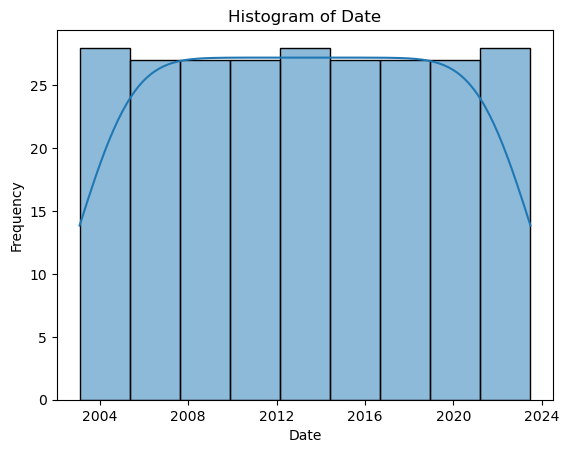

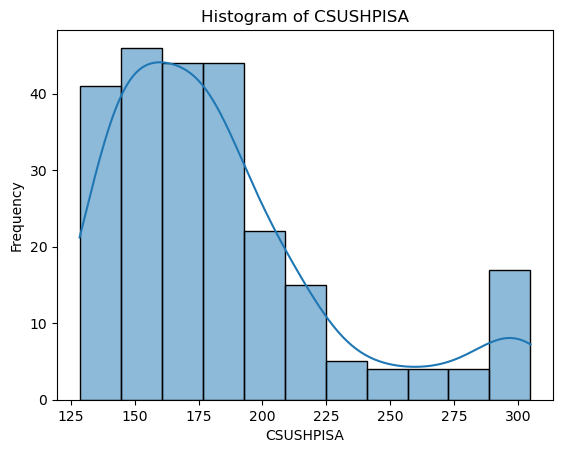

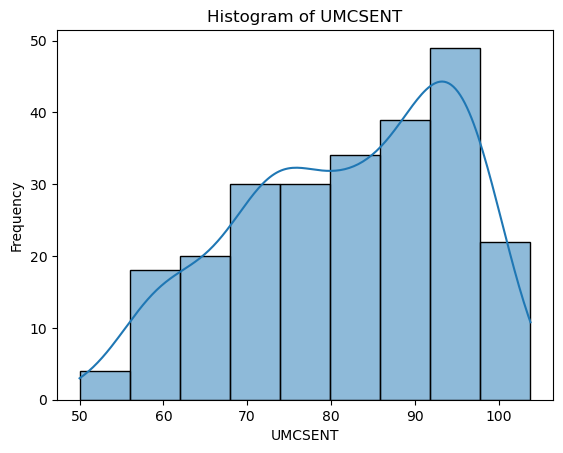

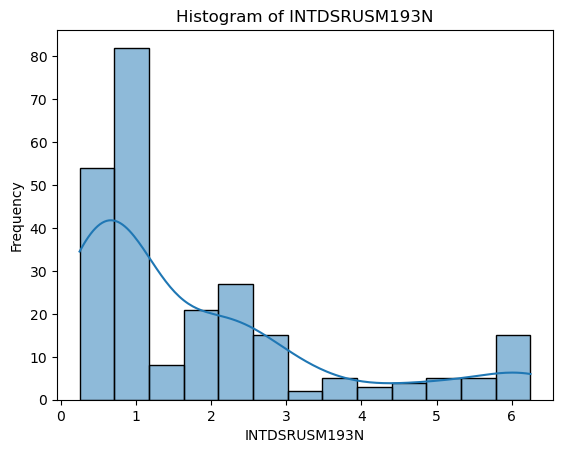

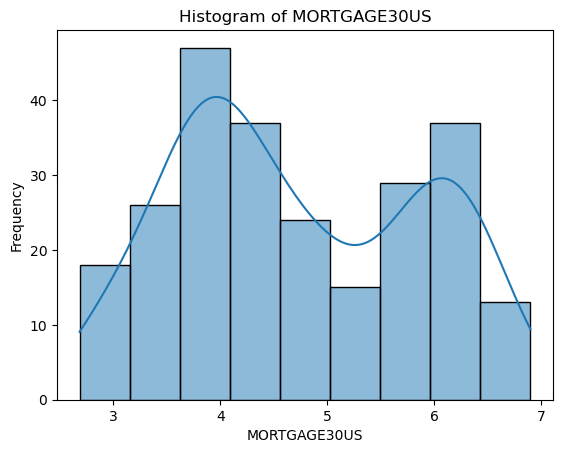

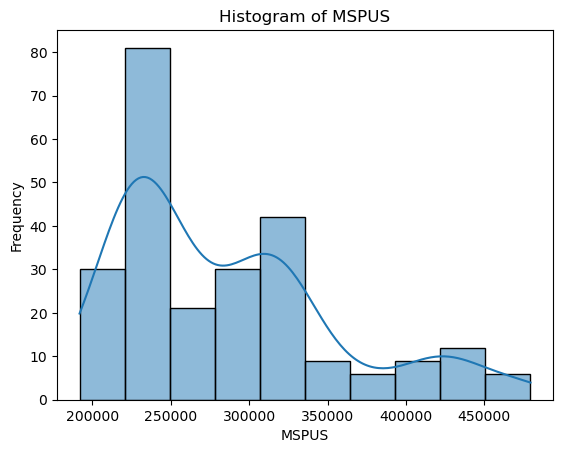

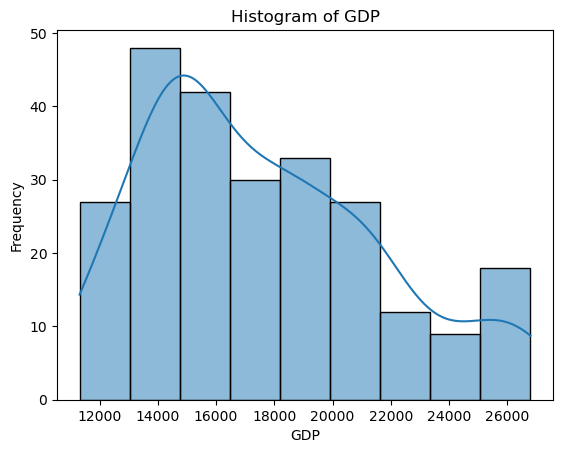

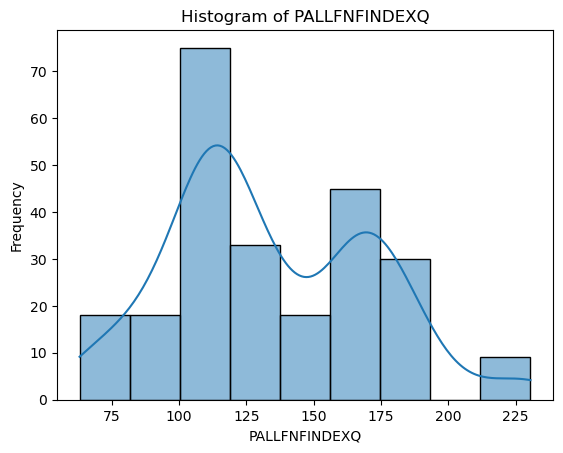

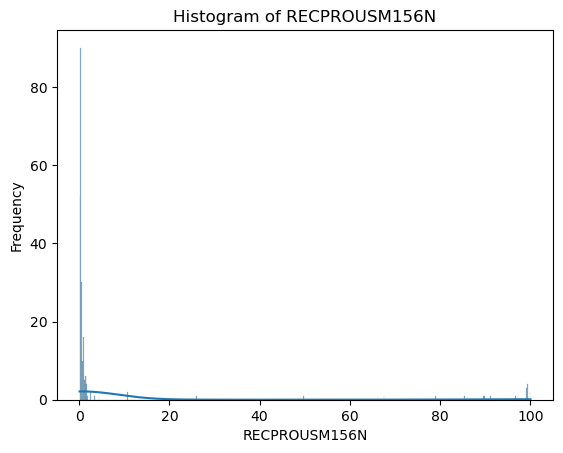

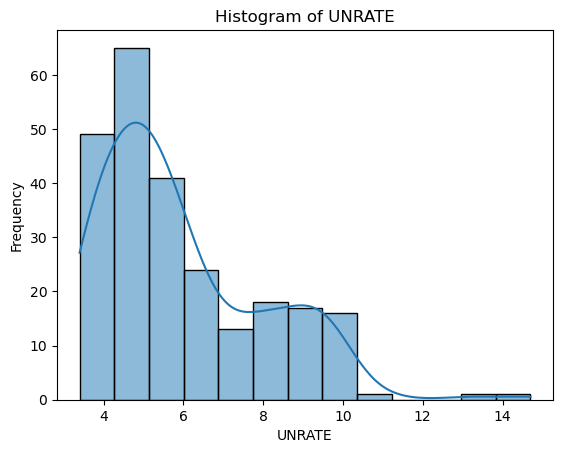

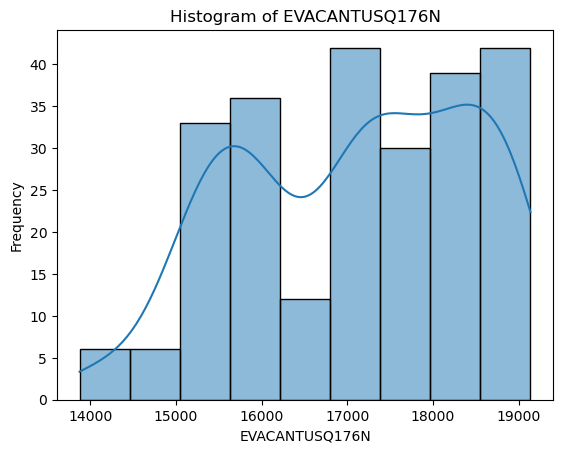

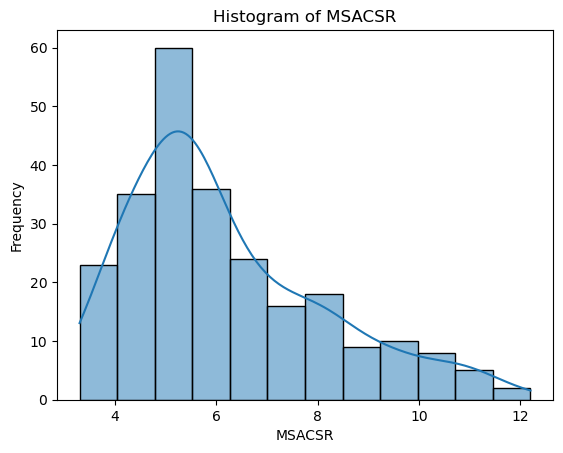

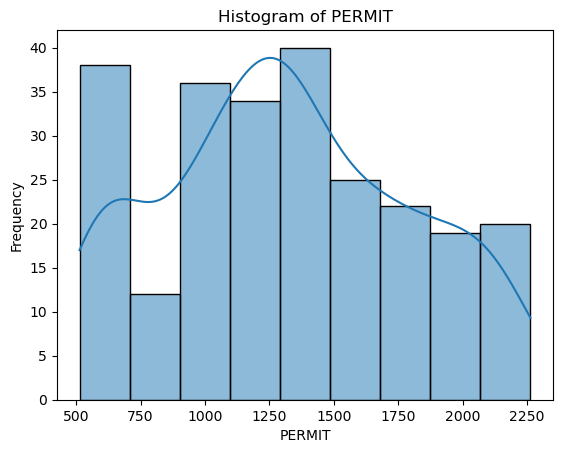

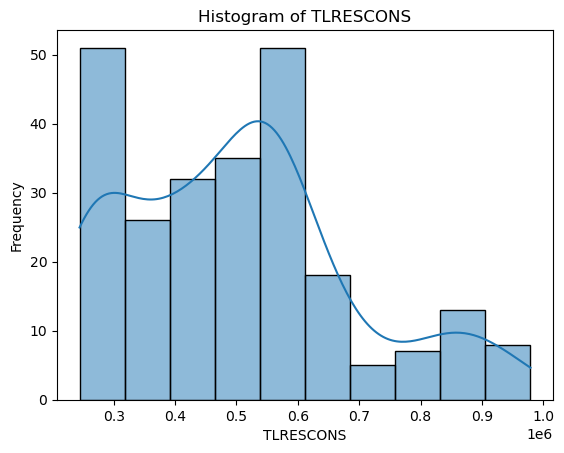

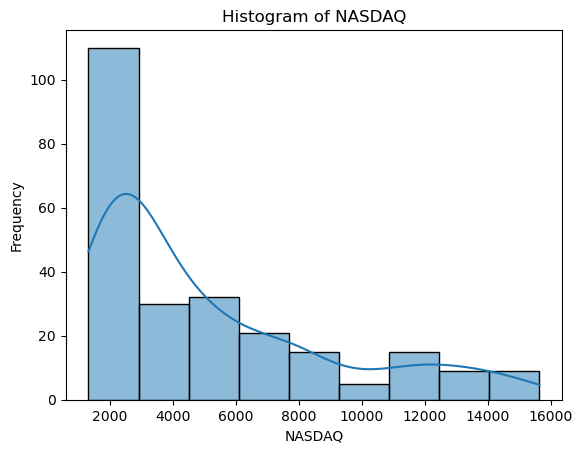

In [102]:
for column in df_1.columns:
    sns.histplot(df_1[column], kde=True)  # Create a histogram with KDE
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## So We need to work more on the Box Plot,To Understand the Data even better, Instead of for Loop we can start working the Data Individuallly

In [103]:
df_1.columns

Index(['Date', 'CSUSHPISA', 'UMCSENT', 'INTDSRUSM193N', 'MORTGAGE30US',
       'MSPUS', 'GDP', 'PALLFNFINDEXQ', 'RECPROUSM156N', 'UNRATE',
       'EVACANTUSQ176N', 'MSACSR', 'PERMIT', 'TLRESCONS', 'NASDAQ'],
      dtype='object')

In [104]:
def create_box_plots(df_1):
    for column in df_1.columns:
        sns.boxplot(data=df_1[column])
        plt.title(f'Box Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Value')
        plt.show()



In [105]:
def create_box_plot(series):
    sns.boxplot(data=series)
    plt.title(f'Box Plot of {series.name}')
    plt.xlabel(series.name)
    plt.ylabel('Value')
    plt.show()

In [106]:
def create_hist_plot(series):
    sns.histplot(data=df_1, x='Date', y=series, kde=True)
    plt.title(f'Histogram Plot Reference with Date {series.name}')
    plt.xlabel('Date')
    plt.ylabel(f'{series.name} Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Individual Analysis of Case_Schiller_Home_Price_Index

In [107]:
df['CSUSHPISA'].describe()

count    246.000000
mean     183.567545
std       44.726180
min      128.460000
25%      148.208000
50%      173.481000
75%      201.238500
max      304.817000
Name: CSUSHPISA, dtype: float64

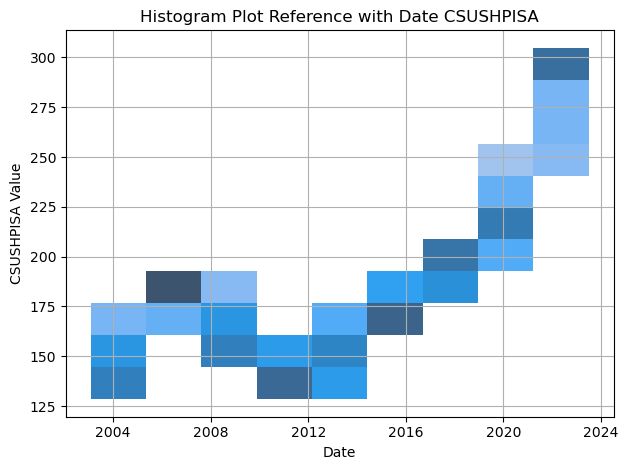

In [108]:
create_hist_plot(df_1['CSUSHPISA'])

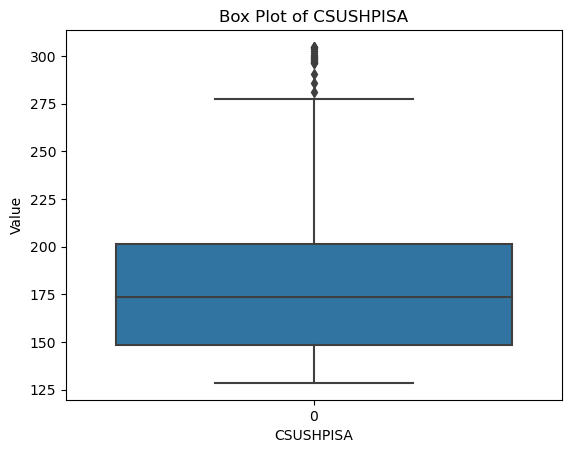

In [109]:
create_box_plot(df_1['CSUSHPISA'])


In [110]:
# In above Value We can see some Extreme Values,above 275  we can deep dive into those values 

df_1[df_1['CSUSHPISA']>275]

## So from Below Observation We can conclude that, the Value of House Price got Increased in the Last two Years. 
##So these Extreme Value help us to understand that Outlier removal is Non Essential here 


Date  CSUSHPISA  UMCSENT  INTDSRUSM193N  MORTGAGE30US     MSPUS  \
226 2021-11-30    277.284     67.4           0.25        3.0675  433100.0   
227 2021-12-31    281.266     70.6           0.25        3.0980  433100.0   
228 2022-01-31    285.708     67.2           0.25        3.4450  449300.0   
229 2022-02-28    290.795     62.8           0.25        3.7625  449300.0   
230 2022-03-31    296.271     59.4           0.25        4.1720  449300.0   
231 2022-04-30    300.625     65.2           0.25        4.9825  468000.0   
232 2022-05-31    303.904     58.4           0.25        5.2300  468000.0   
233 2022-06-30    304.817     50.0           0.25        5.5220  468000.0   
234 2022-07-31    304.108     51.5           0.25        5.4125  479500.0   
235 2022-08-31    301.638     58.2           0.25        5.2225  479500.0   
236 2022-09-30    299.443     58.6           0.25        6.1120  479500.0   
237 2022-10-31    299.017     59.9           0.25        6.9000  429000.0   
238 2022-11-30    298.232     56.8           0.25        6.8050  429000.0   
239 2022-12-31    297.189     59.7           0.25        6.3640  429000.0   
240 2023-01-31    296.601     64.9           0.25        6.2725  416100.0   
241 2023-02-28    296.958     67.0           0.25        6.2575  416100.0   
242 2023-03-31    298.210     62.0           0.25        6.5440  416100.0   
243 2023-04-30    300.214     63.5           0.25        6.3425  416100.0   
244 2023-05-31    302.657     59.2           0.25        6.4250  416100.0   
245 2023-06-30    304.635     64.4           0.25        6.7140  416100.0   

           GDP  PALLFNFINDEXQ  RECPROUSM156N  UNRATE  EVACANTUSQ176N  MSACSR  \
226  24740.480     211.872594            0.2     4.2     15184.00000     6.0   
227  24740.480     211.872594            0.4     3.9     15184.00000     5.6   
228  25248.476     228.735233            0.2     4.0     15312.00000     5.8   
229  25248.476     228.735233            0.2     3.8     15312.00000     6.2   
230  25248.476     228.735233            0.3     3.6     15312.00000     7.0   
231  25723.941     230.461208            0.4     3.6     15340.00000     8.5   
232  25723.941     230.461208            0.4     3.6     15340.00000     8.3   
233  25723.941     230.461208            0.3     3.6     15340.00000     9.5   
234  26137.992     192.598952            0.3     3.5     14593.00000    10.1   
235  26137.992     192.598952            0.3     3.7     14593.00000     8.7   
236  26137.992     192.598952            0.5     3.5     14593.00000     9.7   
237  26529.774     175.165940            1.0     3.7     15102.00000     9.7   
238  26529.774     175.165940            1.6     3.6     15102.00000     9.4   
239  26529.774     175.165940            1.6     3.5     15102.00000     8.5   
240  26798.605     160.631240            0.6     3.4     15049.00000     8.1   
241  26798.605     160.631240            0.8     3.6     15049.00000     8.4   
242  26798.605     160.631240            0.7     3.5     15049.00000     8.1   
243  26798.605     160.631240            0.5     3.4     16000.63124     7.6   
244  26798.605     160.631240            0.6     3.7     16000.63124     7.2   
245  26798.605     160.631240            1.0     3.6     16000.63124     7.5   

     PERMIT  TLRESCONS        NASDAQ  
226  1775.0   862744.0  15537.690430  
227  1948.0   891046.0  15644.969727  
228  1898.0   922478.0  14239.879883  
229  1817.0   941637.0  13751.400391  
230  1877.0   959067.0  14220.519531  
231  1795.0   975266.0  12334.639648  
232  1708.0   979044.0  12081.389648  
233  1701.0   965400.0  11028.740234  
234  1658.0   939588.0  12390.690430  
235  1586.0   917150.0  11816.200195  
236  1588.0   900993.0  10575.620117  
237  1555.0   887097.0  10988.150391  
238  1402.0   874829.0  11468.000000  
239  1409.0   863102.0  10466.480469  
240  1354.0   865778.0  11584.549805  
241  1482.0   857211.0  11455.540039  
242  1437.0   856947.0  12221.910156  
243  1417

In [111]:
df.columns

Index(['CSUSHPISA', 'UMCSENT', 'INTDSRUSM193N', 'MORTGAGE30US', 'MSPUS', 'GDP',
       'PALLFNFINDEXQ', 'RECPROUSM156N', 'UNRATE', 'EVACANTUSQ176N', 'MSACSR',
       'PERMIT', 'TLRESCONS', 'NASDAQ'],
      dtype='object')

## Individual Analysis of Customer_Sentiment_Analysis 

In [112]:
df_1['UMCSENT'].describe()

count    246.000000
mean      81.908537
std       12.807124
min       50.000000
25%       72.500000
50%       83.150000
75%       93.075000
max      103.800000
Name: UMCSENT, dtype: float64

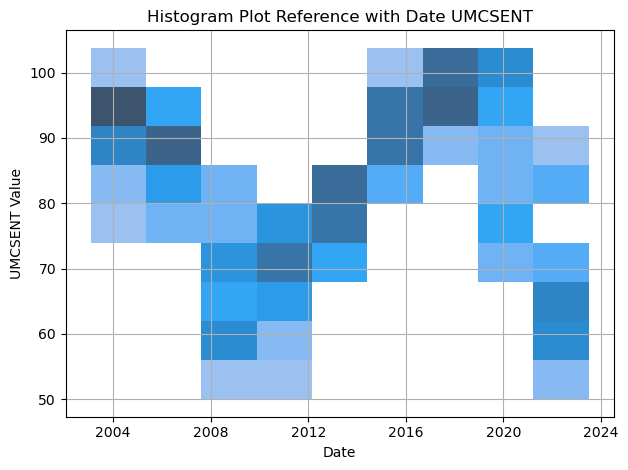

In [113]:
create_hist_plot(df_1['UMCSENT'])

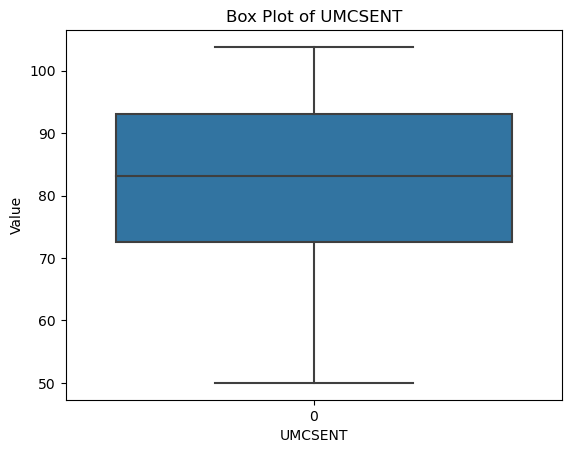

In [114]:
create_box_plot(df_1['UMCSENT'])

We dont have Much Variation in Customer Sentiment Analysis, We can even Work more on Bi-Variate to Claim any Customer Sentiment Relation in the Above Plot 

## Individual Analysis on Interest Rates 

In [115]:
df_1['INTDSRUSM193N'].describe()

count    246.000000
mean       1.794715
std        1.722460
min        0.250000
25%        0.750000
50%        0.750000
75%        2.250000
max        6.250000
Name: INTDSRUSM193N, dtype: float64

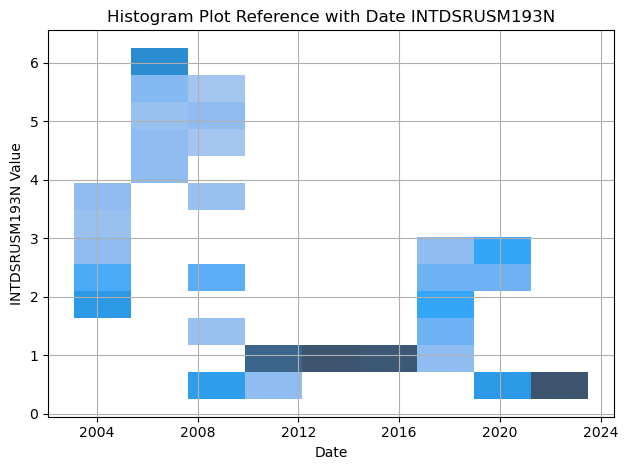

In [116]:
create_hist_plot(df_1['INTDSRUSM193N'])

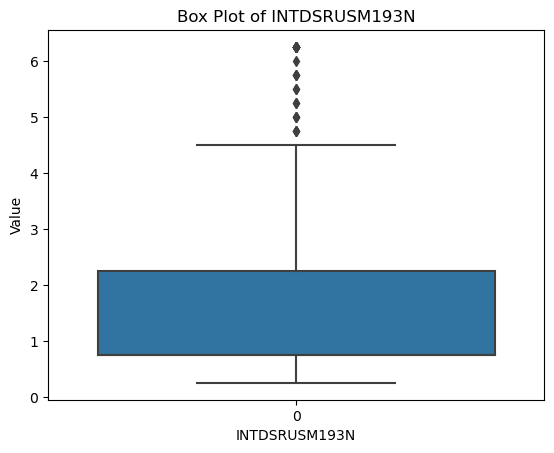

In [117]:
create_box_plot(df_1['INTDSRUSM193N'])

In [118]:
# There Might be Increase Rate Because of the Ongoing Prevailing of Recession, We Still observe that Increased very high during this Period

df_1[df_1['INTDSRUSM193N']>4.5]

Date  CSUSHPISA  UMCSENT  INTDSRUSM193N  MORTGAGE30US     MSPUS  \
32 2005-09-30    176.437     76.9           4.75        5.7740  243600.0   
33 2005-10-31    178.027     74.2           4.75        6.0650  247700.0   
34 2005-11-30    179.680     81.6           5.00        6.3300  247700.0   
35 2005-12-31    180.910     91.5           5.25        6.2720  247700.0   
36 2006-01-31    182.320     91.2           5.50        6.1450  246300.0   
37 2006-02-28    183.287     86.7           5.50        6.2525  246300.0   
38 2006-03-31    184.364     88.9           5.75        6.3240  246300.0   
39 2006-04-30    184.329     87.4           5.75        6.5075  235600.0   
40 2006-05-31    184.156     79.1           6.00        6.5975  235600.0   
41 2006-06-30    183.507     84.9           6.25        6.6820  235600.0   
42 2006-07-31    183.067     84.7           6.25        6.7625  245400.0   
43 2006-08-31    182.596     82.0           6.25        6.5240  245400.0   
44 2006-09-30    182.798     85.4           6.25        6.4025  245400.0   
45 2006-10-31    183.198     93.6           6.25        6.3575  257400.0   
46 2006-11-30    183.609     92.1           6.25        6.2400  257400.0   
47 2006-12-31    184.138     91.7           6.25        6.1350  257400.0   
48 2007-01-31    184.516     96.9           6.25        6.2175  242200.0   
49 2007-02-28    184.598     91.3           6.25        6.2850  242200.0   
50 2007-03-31    184.149     88.4           6.25        6.1560  242200.0   
51 2007-04-30    183.010     87.1           6.25        6.1800  241800.0   
52 2007-05-31    181.600     88.3           6.25        6.2620  241800.0   
53 2007-06-30    180.254     85.3           6.25        6.6575  241800.0   
54 2007-07-31    179.111     90.4           6.25        6.6950  238400.0   
55 2007-08-31    178.117     83.4           5.75        6.5720  238400.0   
56 2007-09-30    177.558     83.4           5.25        6.3825  238400.0   
57 2007-10-31    176.624     80.9           5.00        6.3750  233900.0   
58 2007-11-30    175.147     76.1           5.00        6.2080  233900.0   
59 2007-12-31    174.342     75.5           4.75        6.0950  233900.0   

          GDP  PALLFNFINDEXQ  RECPROUSM156N  UNRATE  EVACANTUSQ176N  MSACSR  \
32  13324.204     104.726877           10.7     5.0         15823.0     4.7   
33  13599.160     106.953510            0.5     5.0         16234.0     4.5   
34  13599.160     106.953510            0.4     5.0         16234.0     5.0   
35  13599.160     106.953510            0.4     4.9         16234.0     4.9   
36  13753.424     117.494178            0.3     4.7         16513.0     5.3   
37  13753.424     117.494178            0.3     4.8         16513.0     6.1   
38  13753.424     117.494178            0.4     4.7         16513.0     5.9   
39  13870.188     118.665345            0.5     4.7         16769.0     6.3   
40  13870.188     118.665345            0.6     4.6         16769.0     6.2   
41  13870.188     118.665345            0.4     4.6         16769.0     6.3   
42  14039.560     113.189378            0.5     4.7         16894.0     7.3   
43  14039.560     113.189378            0.5     4.7         16894.0     6.7   
44  14039.560     113.189378            0.6     4.5         16894.0     6.7   
45  14215.651     115.806348            0.5     4.4         17724.0     7.3   
46  14215.651     115.806348            0.6     4.5         17724.0     6.6   
47  14215.651     115.806348            0.4     4.4         17724.0     6.5   
48  14402.082     126.755152            0.7     4.6         17547.0     7.2   
49  14402.082     126.755152            0.5     4.5         17547.0     7.9   
50  14402.082     126.755152            0.5     4.4         17547.0     7.9   
51  14564.117     128.980819            0.6     4.5         18049.0     7.4   
52  14564.117     128.980819            0.8     4.4         18049.0     7.8   
53  14564.117     128.980819            1.1     4.6         18049.

In [119]:
df_1.head()

Date  CSUSHPISA  UMCSENT  INTDSRUSM193N  MORTGAGE30US     MSPUS  \
0 2003-01-31    128.460     82.4           2.25        5.9160  191800.0   
1 2003-02-28    129.355     79.9           2.25        5.8425  191800.0   
2 2003-03-31    130.147     77.6           2.25        5.7450  191800.0   
3 2003-04-30    130.884     86.0           2.25        5.8125  191900.0   
4 2003-05-31    131.734     92.1           2.25        5.4840  191900.0   

         GDP  PALLFNFINDEXQ  RECPROUSM156N  UNRATE  EVACANTUSQ176N  MSACSR  \
0  11312.766      63.112509            1.0     5.8         15244.0     4.0   
1  11312.766      63.112509            1.7     5.9         15244.0     4.5   
2  11312.766      63.112509            1.5     5.9         15244.0     4.1   
3  11566.669      64.076433            1.1     6.0         15614.0     4.1   
4  11566.669      64.076433            0.5     6.1         15614.0     3.9   

   PERMIT  TLRESCONS       NASDAQ  
0  1808.0   423049.0  1320.910034  
1  1854.0   422705.0  1337.520020  
2  1757.0   418232.0  1341.170044  
3  1803.0   425493.0  1464.310059  
4  1835.0   426270.0  1595.910034

## Individual Analysis on Mortgage_Rate 

In [120]:
df_1['MORTGAGE30US'].describe()

count    246.000000
mean       4.725811
std        1.129850
min        2.684000
25%        3.813750
50%        4.478750
75%        5.818125
max        6.900000
Name: MORTGAGE30US, dtype: float64

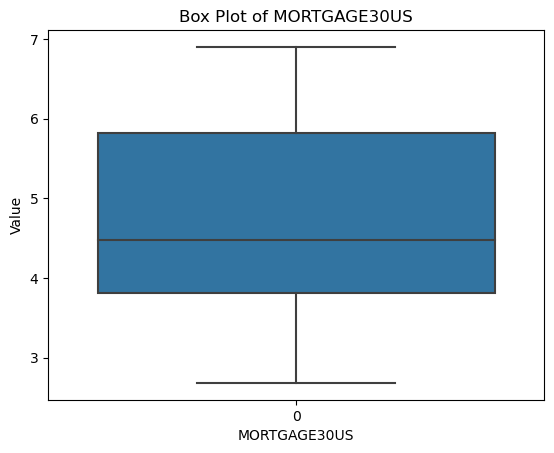

In [121]:
create_box_plot(df_1['MORTGAGE30US'])

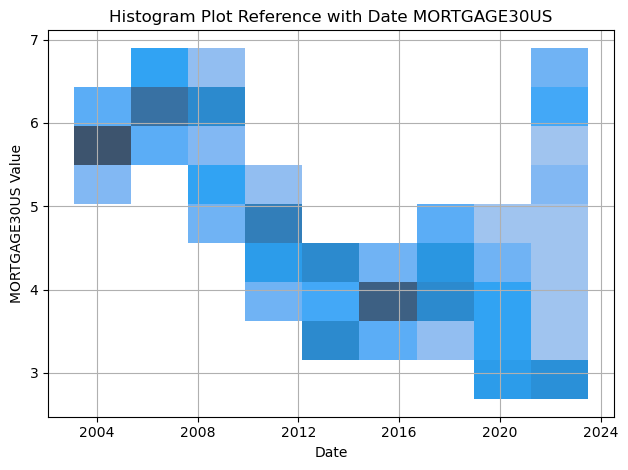

In [122]:
create_hist_plot(df_1['MORTGAGE30US'])

In [123]:
# We Can Observe that Morgage Rate has been very High Recently 

df_1[df_1['MORTGAGE30US']>6.6]


Date  CSUSHPISA  UMCSENT  INTDSRUSM193N  MORTGAGE30US     MSPUS  \
41  2006-06-30    183.507     84.9           6.25        6.6820  235600.0   
42  2006-07-31    183.067     84.7           6.25        6.7625  245400.0   
53  2007-06-30    180.254     85.3           6.25        6.6575  241800.0   
54  2007-07-31    179.111     90.4           6.25        6.6950  238400.0   
237 2022-10-31    299.017     59.9           0.25        6.9000  429000.0   
238 2022-11-30    298.232     56.8           0.25        6.8050  429000.0   
245 2023-06-30    304.635     64.4           0.25        6.7140  416100.0   

           GDP  PALLFNFINDEXQ  RECPROUSM156N  UNRATE  EVACANTUSQ176N  MSACSR  \
41   13870.188     118.665345            0.4     4.6     16769.00000     6.3   
42   14039.560     113.189378            0.5     4.7     16894.00000     7.3   
53   14564.117     128.980819            1.1     4.6     18049.00000     8.2   
54   14715.058     144.938212            1.3     4.7     17910.00000     8.3   
237  26529.774     175.165940            1.0     3.7     15102.00000     9.7   
238  26529.774     175.165940            1.6     3.6     15102.00000     9.4   
245  26798.605     160.631240            1.0     3.6     16000.63124     7.5   

     PERMIT  TLRESCONS        NASDAQ  
41   1867.0   621219.0   2172.090088  
42   1763.0   604020.0   2091.469971  
53   1407.0   513524.0   2603.229980  
54   1361.0   503486.0   2546.270020  
237  1555.0   887097.0  10988.150391  
238  1402.0   874829.0  11468.000000  
245  1441.0   876684.0  13787.919922

In [124]:
df_1['MSPUS'].describe()

count       246.000000
mean     285462.195122
std       69522.058118
min      191800.000000
25%      228800.000000
50%      266450.000000
75%      322500.000000
max      479500.000000
Name: MSPUS, dtype: float64

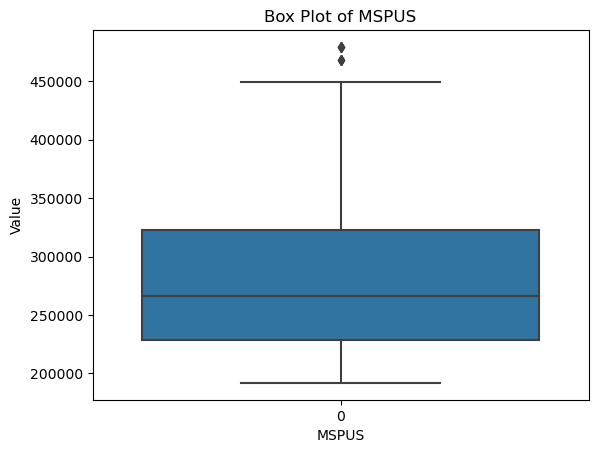

In [125]:
create_box_plot(df_1['MSPUS'])

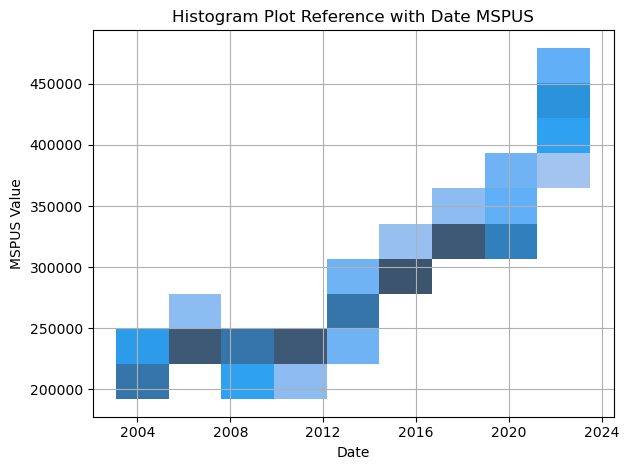

In [126]:
create_hist_plot(df_1['MSPUS'])

In [127]:
# Median Sold price of House_hold Value is High in the time of 2022. We need to Figure any changes when started observing the Bi Variate 

df_1[df_1['MSPUS']>450000]

Date  CSUSHPISA  UMCSENT  INTDSRUSM193N  MORTGAGE30US     MSPUS  \
231 2022-04-30    300.625     65.2           0.25        4.9825  468000.0   
232 2022-05-31    303.904     58.4           0.25        5.2300  468000.0   
233 2022-06-30    304.817     50.0           0.25        5.5220  468000.0   
234 2022-07-31    304.108     51.5           0.25        5.4125  479500.0   
235 2022-08-31    301.638     58.2           0.25        5.2225  479500.0   
236 2022-09-30    299.443     58.6           0.25        6.1120  479500.0   

           GDP  PALLFNFINDEXQ  RECPROUSM156N  UNRATE  EVACANTUSQ176N  MSACSR  \
231  25723.941     230.461208            0.4     3.6         15340.0     8.5   
232  25723.941     230.461208            0.4     3.6         15340.0     8.3   
233  25723.941     230.461208            0.3     3.6         15340.0     9.5   
234  26137.992     192.598952            0.3     3.5         14593.0    10.1   
235  26137.992     192.598952            0.3     3.7         14593.0     8.7   
236  26137.992     192.598952            0.5     3.5         14593.0     9.7   

     PERMIT  TLRESCONS        NASDAQ  
231  1795.0   975266.0  12334.639648  
232  1708.0   979044.0  12081.389648  
233  1701.0   965400.0  11028.740234  
234  1658.0   939588.0  12390.690430  
235  1586.0   917150.0  11816.200195  
236  1588.0   900993.0  10575.620117

In [128]:
df_1['GDP'].describe()

count      246.000000
mean     17605.664707
std       4025.530646
min      11312.766000
25%      14564.117000
50%      16805.309500
75%      20470.197000
max      26798.605000
Name: GDP, dtype: float64

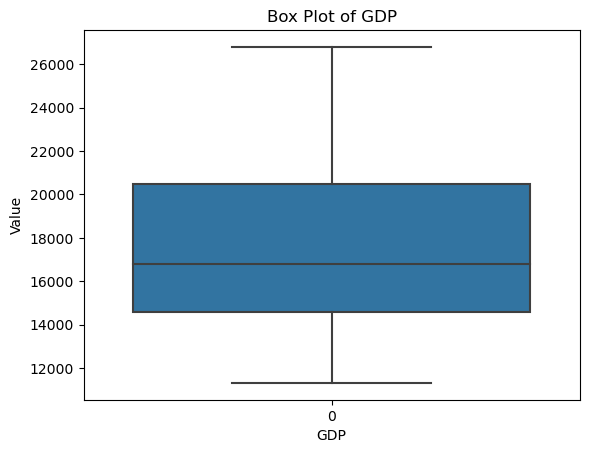

In [129]:
create_box_plot(df_1['GDP'])

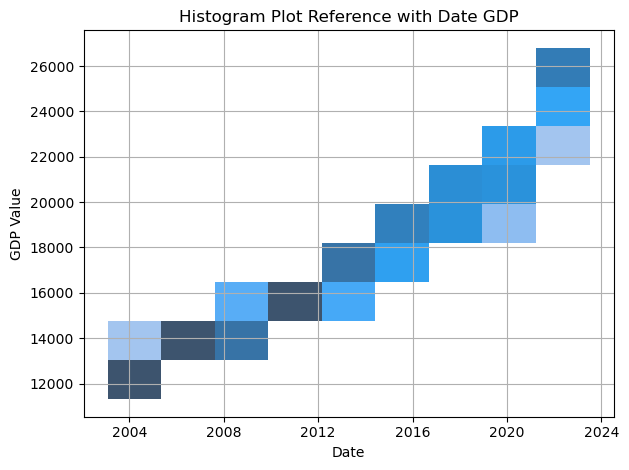

In [130]:
create_hist_plot(df_1['GDP'])

In [131]:
df_1['PALLFNFINDEXQ'].describe()

count    246.000000
mean     134.035057
std       37.623208
min       63.112509
25%      107.373269
50%      125.072985
75%      166.525647
max      230.461208
Name: PALLFNFINDEXQ, dtype: float64

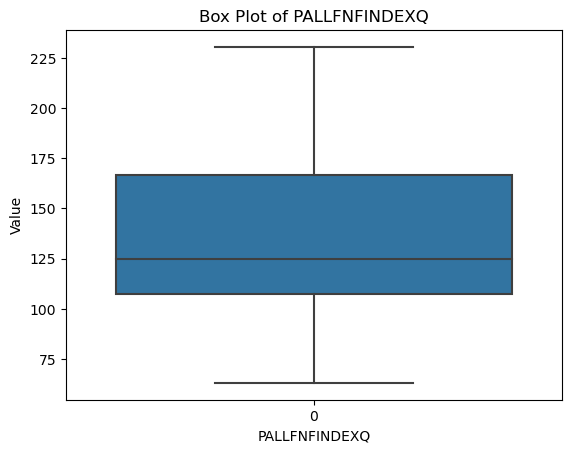

In [132]:
create_box_plot(df_1['PALLFNFINDEXQ'])

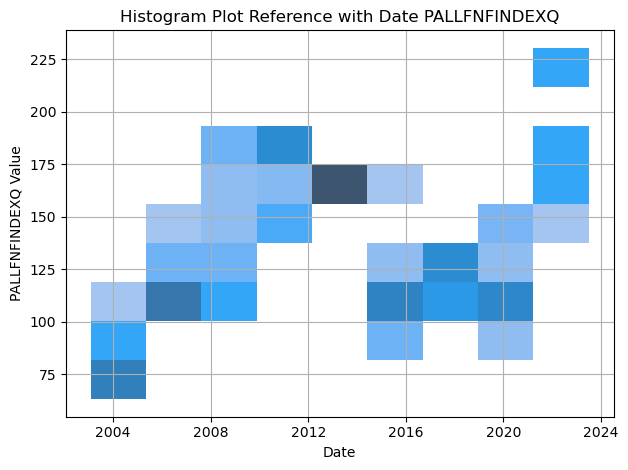

In [133]:
create_hist_plot(df_1['PALLFNFINDEXQ'])

In [134]:
df_1['RECPROUSM156N'].describe()

count    246.000000
mean       7.635366
std       24.225659
min        0.100000
25%        0.300000
50%        0.400000
75%        0.900000
max      100.000000
Name: RECPROUSM156N, dtype: float64

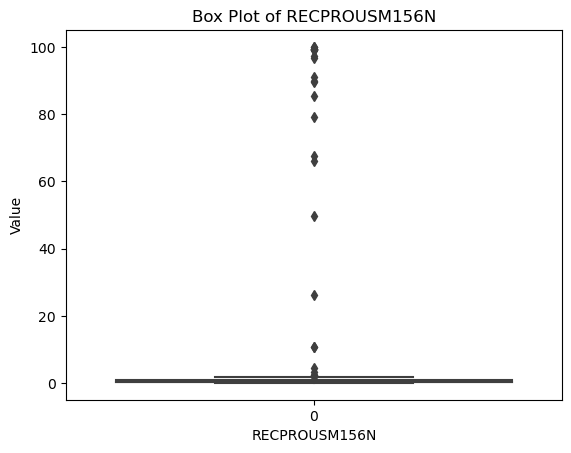

In [135]:
create_box_plot(df_1['RECPROUSM156N'])

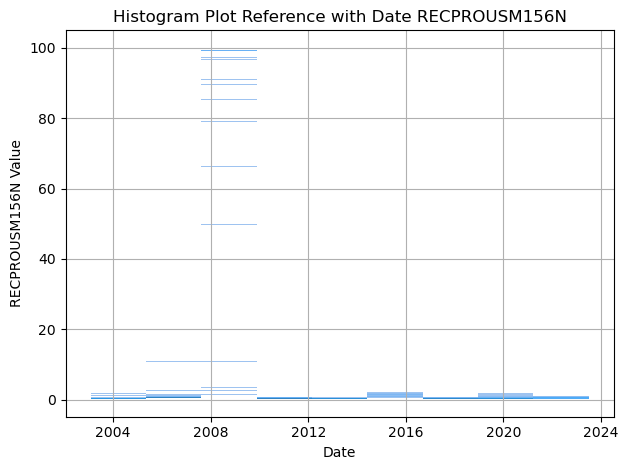

In [136]:
create_hist_plot(df_1['RECPROUSM156N'])

In [137]:
df_1[df_1['RECPROUSM156N']>5]

Date  CSUSHPISA  UMCSENT  INTDSRUSM193N  MORTGAGE30US     MSPUS  \
32  2005-09-30    176.437     76.9           4.75        5.7740  243600.0   
59  2007-12-31    174.342     75.5           4.75        6.0950  233900.0   
60  2008-01-31    173.132     78.4           3.50        5.7580  235300.0   
61  2008-02-29    171.540     70.8           3.50        5.9175  235300.0   
62  2008-03-31    170.053     69.5           2.50        5.9700  235300.0   
63  2008-04-30    168.338     62.6           2.25        5.9175  226500.0   
64  2008-05-31    166.659     59.8           2.25        6.0360  226500.0   
65  2008-06-30    165.017     56.4           2.25        6.3200  226500.0   
66  2008-07-31    163.566     61.2           2.25        6.4260  222500.0   
67  2008-08-31    161.988     63.0           2.25        6.4775  222500.0   
68  2008-09-30    160.308     70.3           2.25        6.0375  222500.0   
69  2008-10-31    158.326     57.6           1.25        6.2000  208400.0   
70  2008-11-30    156.141     55.3           1.25        6.0875  208400.0   
71  2008-12-31    153.618     60.1           0.50        5.2860  208400.0   
72  2009-01-31    151.506     61.2           0.50        5.0475  220900.0   
73  2009-02-28    150.014     56.3           0.50        5.1300  220900.0   
74  2009-03-31    148.660     57.3           0.50        5.0025  220900.0   
75  2009-04-30    147.948     65.1           0.50        4.8100  214300.0   
76  2009-05-31    147.695     68.7           0.50        4.8575  214300.0   
77  2009-06-30    148.090     70.8           0.50        5.4200  214300.0   
206 2020-03-31    216.314     89.1           0.25        3.4500  322600.0   
207 2020-04-30    216.809     71.8           0.25        3.3060  337500.0   

           GDP  PALLFNFINDEXQ  RECPROUSM156N  UNRATE  EVACANTUSQ176N  MSACSR  \
32   13324.204     104.726877           10.7     5.0         15823.0     4.7   
59   14706.538     162.326261           10.8     5.0         18642.0     9.6   
60   14865.701     189.085437           26.1     5.0         18701.0     9.3   
61   14865.701     189.085437           49.8     4.9         18701.0     9.7   
62   14865.701     189.085437           67.5     5.1         18701.0    10.5   
63   14898.999     181.816046           79.1     5.0         18651.0    10.3   
64   14898.999     181.816046           85.4     5.4         18651.0    10.7   
65   14898.999     181.816046           89.8     5.6         18651.0    10.7   
66   14608.208     117.017439           96.6     5.8         18973.0    10.5   
67   14608.208     117.017439           99.2     6.1         18973.0    11.3   
68   14608.208     117.017439           99.3     6.1         18973.0    10.9   
69   14430.901     102.098634           91.1     6.5         19137.0    11.6   
70   14430.901     102.098634           99.3     6.8         19137.0    11.4   
71   14430.901     102.098634           99.3     7.3         19137.0    11.2   
72   14381.236     111.734830           99.3     7.8         18752.0    12.2   
73   14381.236     111.734830           99.2     8.3         18752.0    10.5   
74   14381.236     111.734830           99.1     8.7         18752.0    11.0   
75   14448.882     119.420248           97.2     9.0         18996.0    10.7   
76   14448.882     119.420248           89.6     9.4         18996.0     9.3   
77   14448.882     119.420248           66.2     9.5         18996.0     8.5   
206  19636.731      92.219554          100.0     4.4         13876.0     6.5   
207  21362.428     106.631885          100.0    14.7         14248.0     6.9   

     PERMIT  TLRESCONS       NASDAQ  
32   2263.0   652748.0  2151.689941  
59   1149.0   423699.0  2652.280029  
60   1094.0   409420.0  2389.860107  
61   1014.0   393193.0  2271.479980  
62    967.0   397469.0  2279.100098  
63   1008.0   392801.0  2412.800049  
64    995.0   389335.0  2522.659912  
65   1180.0   382000.0  2292.979980  
66    921.0   372755.0  2325.550049  
67    858.0   360

In [138]:
df_1['UNRATE'].describe()

count    246.000000
mean       5.951626
std        2.045338
min        3.400000
25%        4.500000
50%        5.400000
75%        7.275000
max       14.700000
Name: UNRATE, dtype: float64

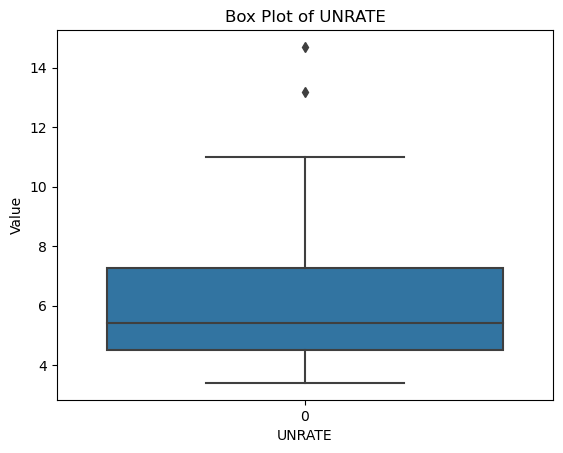

In [139]:
create_box_plot(df_1['UNRATE'])

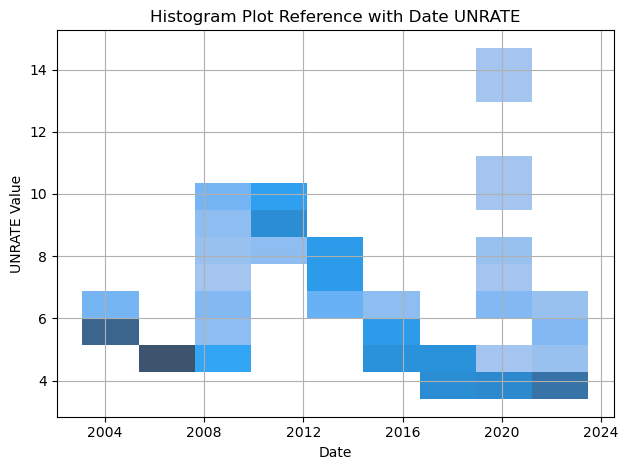

In [140]:
create_hist_plot(df_1['UNRATE'])

In [141]:
# The Rise of Unemployment is Very high in the time span of 2020,

df_1[df_1['UNRATE']>11]

Date  CSUSHPISA  UMCSENT  INTDSRUSM193N  MORTGAGE30US     MSPUS  \
207 2020-04-30    216.809     71.8           0.25        3.3060  337500.0   
208 2020-05-31    217.015     72.3           0.25        3.2325  337500.0   

           GDP  PALLFNFINDEXQ  RECPROUSM156N  UNRATE  EVACANTUSQ176N  MSACSR  \
207  21362.428     106.631885          100.0    14.7         14248.0     6.9   
208  21362.428     106.631885            0.2    13.2         14248.0     5.4   

     PERMIT  TLRESCONS       NASDAQ  
207  1050.0   604385.0  8889.549805  
208  1253.0   592258.0  9489.870117

In [142]:
# We can see there is slight down in umemployment rate at Present time
df_1[df_1['Date']=='2023-04-30']

Date  CSUSHPISA  UMCSENT  INTDSRUSM193N  MORTGAGE30US     MSPUS  \
243 2023-04-30    300.214     63.5           0.25        6.3425  416100.0   

           GDP  PALLFNFINDEXQ  RECPROUSM156N  UNRATE  EVACANTUSQ176N  MSACSR  \
243  26798.605      160.63124            0.5     3.4     16000.63124     7.6   

     PERMIT  TLRESCONS        NASDAQ  
243  1417.0   834713.0  12226.580078

In [143]:
df_1['EVACANTUSQ176N'].describe()

count      246.000000
mean     17087.458918
std       1369.230121
min      13876.000000
25%      15883.000000
50%      17263.000000
75%      18219.000000
max      19137.000000
Name: EVACANTUSQ176N, dtype: float64

Housing_Inventory_Estimate-EVACANTUSQ176N: United States Housing Inventory Estimate - Vacant Housing Units (Thousands of Units, Not Adjusted for Seasonal Variations). This metric offers an estimation of the quantity of unoccupied residential units in the United States.



In [144]:
df_1.columns

Index(['Date', 'CSUSHPISA', 'UMCSENT', 'INTDSRUSM193N', 'MORTGAGE30US',
       'MSPUS', 'GDP', 'PALLFNFINDEXQ', 'RECPROUSM156N', 'UNRATE',
       'EVACANTUSQ176N', 'MSACSR', 'PERMIT', 'TLRESCONS', 'NASDAQ'],
      dtype='object')

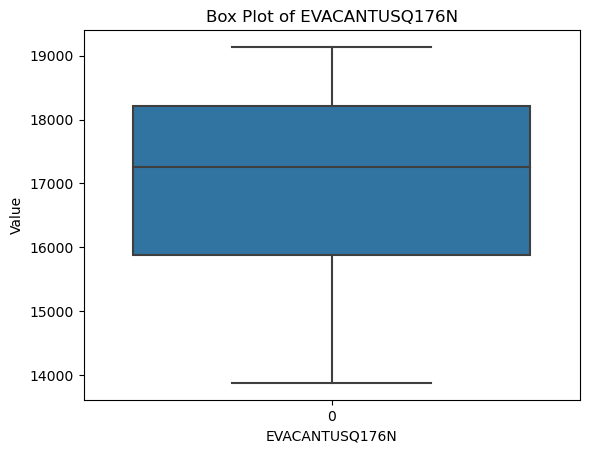

In [145]:
create_box_plot(df_1['EVACANTUSQ176N'])

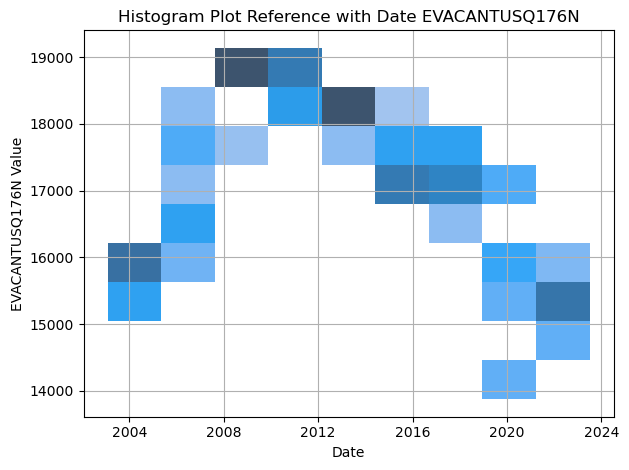

In [146]:
create_hist_plot(df_1['EVACANTUSQ176N'])

In [147]:
# In Housing there is some issue in term of Consitency of Data, which have addressed by verify the various websites 

Monthly New Home Supply-MSACSR: United States Monthly New Home Supply (Seasonally Adjusted). This metric reflects the monthly availability of newly constructed homes in the United States.



In [148]:
df_1.head()

Date  CSUSHPISA  UMCSENT  INTDSRUSM193N  MORTGAGE30US     MSPUS  \
0 2003-01-31    128.460     82.4           2.25        5.9160  191800.0   
1 2003-02-28    129.355     79.9           2.25        5.8425  191800.0   
2 2003-03-31    130.147     77.6           2.25        5.7450  191800.0   
3 2003-04-30    130.884     86.0           2.25        5.8125  191900.0   
4 2003-05-31    131.734     92.1           2.25        5.4840  191900.0   

         GDP  PALLFNFINDEXQ  RECPROUSM156N  UNRATE  EVACANTUSQ176N  MSACSR  \
0  11312.766      63.112509            1.0     5.8         15244.0     4.0   
1  11312.766      63.112509            1.7     5.9         15244.0     4.5   
2  11312.766      63.112509            1.5     5.9         15244.0     4.1   
3  11566.669      64.076433            1.1     6.0         15614.0     4.1   
4  11566.669      64.076433            0.5     6.1         15614.0     3.9   

   PERMIT  TLRESCONS       NASDAQ  
0  1808.0   423049.0  1320.910034  
1  1854.0   422705.0  1337.520020  
2  1757.0   418232.0  1341.170044  
3  1803.0   425493.0  1464.310059  
4  1835.0   426270.0  1595.910034

In [149]:
df_1['MSACSR'].describe()

count    246.000000
mean       6.178862
std        1.946625
min        3.300000
25%        4.825000
50%        5.600000
75%        7.300000
max       12.200000
Name: MSACSR, dtype: float64

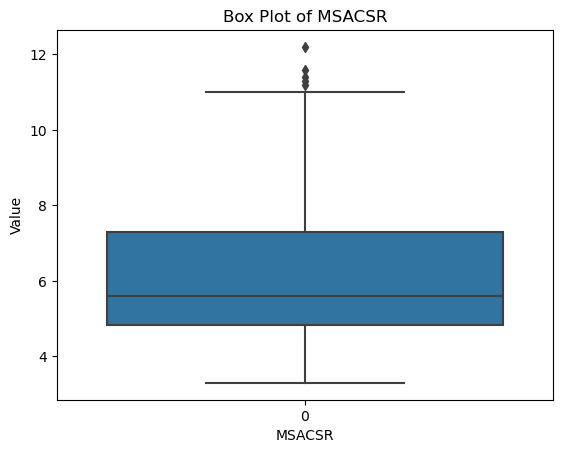

In [150]:
create_box_plot(df_1['MSACSR'])

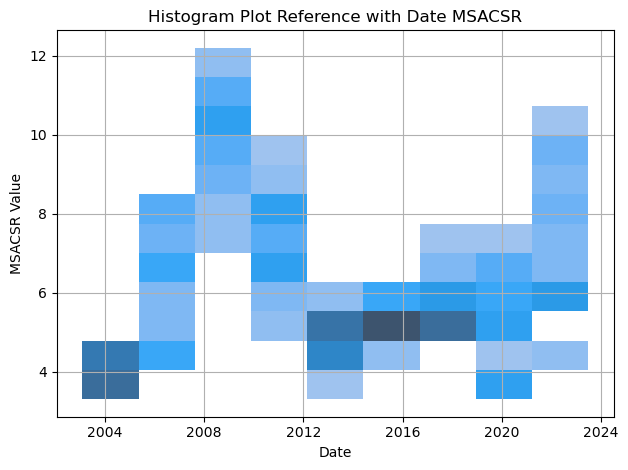

In [151]:
create_hist_plot(df_1['MSACSR'])

In [152]:
## As Expected the Most home are available during the particular period between the 2008 times 

df_1[df_1['MSACSR']>11]

Date  CSUSHPISA  UMCSENT  INTDSRUSM193N  MORTGAGE30US     MSPUS  \
67 2008-08-31    161.988     63.0           2.25        6.4775  222500.0   
69 2008-10-31    158.326     57.6           1.25        6.2000  208400.0   
70 2008-11-30    156.141     55.3           1.25        6.0875  208400.0   
71 2008-12-31    153.618     60.1           0.50        5.2860  208400.0   
72 2009-01-31    151.506     61.2           0.50        5.0475  220900.0   

          GDP  PALLFNFINDEXQ  RECPROUSM156N  UNRATE  EVACANTUSQ176N  MSACSR  \
67  14608.208     117.017439           99.2     6.1         18973.0    11.3   
69  14430.901     102.098634           91.1     6.5         19137.0    11.6   
70  14430.901     102.098634           99.3     6.8         19137.0    11.4   
71  14430.901     102.098634           99.3     7.3         19137.0    11.2   
72  14381.236     111.734830           99.3     7.8         18752.0    12.2   

    PERMIT  TLRESCONS       NASDAQ  
67   858.0   360382.0  2367.520020  
69   736.0   336824.0  1720.949951  
70   626.0   320284.0  1535.569946  
71   554.0   301332.0  1577.030029  
72   545.0   291523.0  1476.420044

In [153]:
df_1['PERMIT'].describe()

count     246.000000
mean     1312.483740
std       474.439525
min       513.000000
25%       995.500000
50%      1295.500000
75%      1657.250000
max      2263.000000
Name: PERMIT, dtype: float64

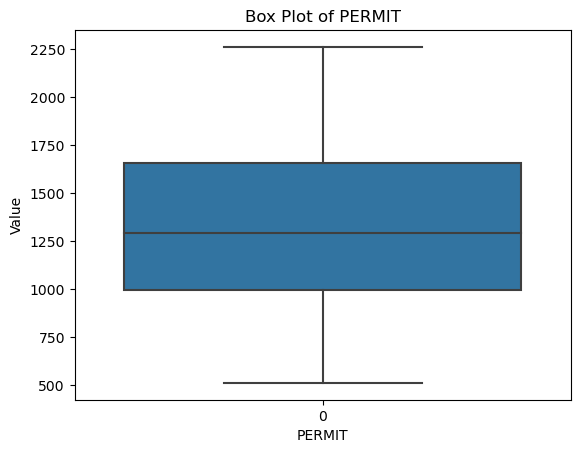

In [154]:
create_box_plot(df_1['PERMIT'])

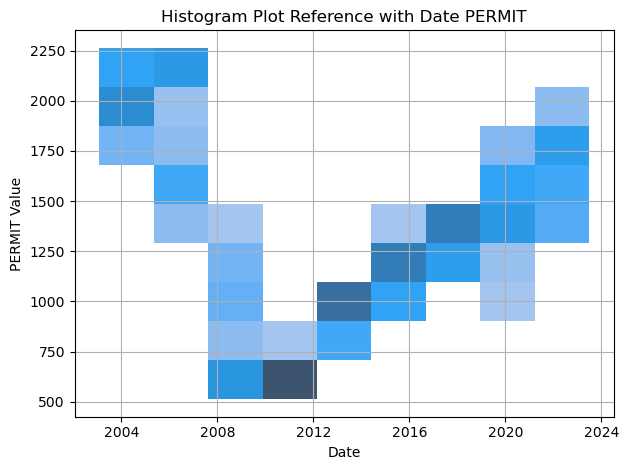

In [155]:
create_hist_plot(df_1['PERMIT'])

New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units (Thousands of Units, Seasonally Adjusted Annual Rate). This variable represents the number of new housing units authorized for construction in permit-issuing places. We gather and examine more during the time Bi-Variate Analysis 

In [156]:
df_1['TLRESCONS'].describe()

count       246.000000
mean     500731.199187
std      186364.456684
min      244399.000000
25%      353555.000000
50%      503689.000000
75%      589624.750000
max      979044.000000
Name: TLRESCONS, dtype: float64

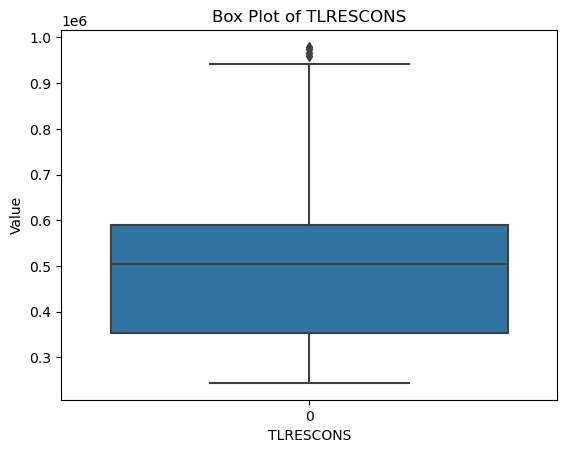

In [157]:
create_box_plot(df_1['TLRESCONS'])

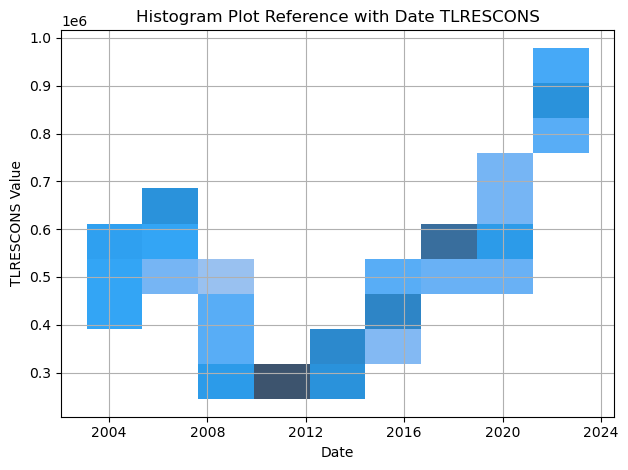

In [158]:
create_hist_plot(df_1['TLRESCONS'])

In [159]:
# Construction Spending is very high during the time of 2022, the people started spending more on construction

df_1[df_1['TLRESCONS']>909624.750000]

Date  CSUSHPISA  UMCSENT  INTDSRUSM193N  MORTGAGE30US     MSPUS  \
228 2022-01-31    285.708     67.2           0.25        3.4450  449300.0   
229 2022-02-28    290.795     62.8           0.25        3.7625  449300.0   
230 2022-03-31    296.271     59.4           0.25        4.1720  449300.0   
231 2022-04-30    300.625     65.2           0.25        4.9825  468000.0   
232 2022-05-31    303.904     58.4           0.25        5.2300  468000.0   
233 2022-06-30    304.817     50.0           0.25        5.5220  468000.0   
234 2022-07-31    304.108     51.5           0.25        5.4125  479500.0   
235 2022-08-31    301.638     58.2           0.25        5.2225  479500.0   

           GDP  PALLFNFINDEXQ  RECPROUSM156N  UNRATE  EVACANTUSQ176N  MSACSR  \
228  25248.476     228.735233            0.2     4.0         15312.0     5.8   
229  25248.476     228.735233            0.2     3.8         15312.0     6.2   
230  25248.476     228.735233            0.3     3.6         15312.0     7.0   
231  25723.941     230.461208            0.4     3.6         15340.0     8.5   
232  25723.941     230.461208            0.4     3.6         15340.0     8.3   
233  25723.941     230.461208            0.3     3.6         15340.0     9.5   
234  26137.992     192.598952            0.3     3.5         14593.0    10.1   
235  26137.992     192.598952            0.3     3.7         14593.0     8.7   

     PERMIT  TLRESCONS        NASDAQ  
228  1898.0   922478.0  14239.879883  
229  1817.0   941637.0  13751.400391  
230  1877.0   959067.0  14220.519531  
231  1795.0   975266.0  12334.639648  
232  1708.0   979044.0  12081.389648  
233  1701.0   965400.0  11028.740234  
234  1658.0   939588.0  12390.690430  
235  1586.0   917150.0  11816.200195

In [160]:
df_1['NASDAQ'].describe()

count      246.000000
mean      5135.927404
std       3802.468445
min       1320.910034
25%       2261.109925
50%       3298.155029
75%       7279.557617
max      15644.969727
Name: NASDAQ, dtype: float64

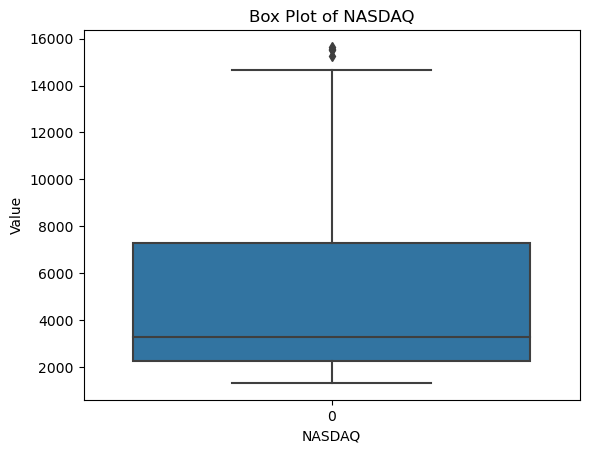

In [161]:
create_box_plot(df_1['NASDAQ'])

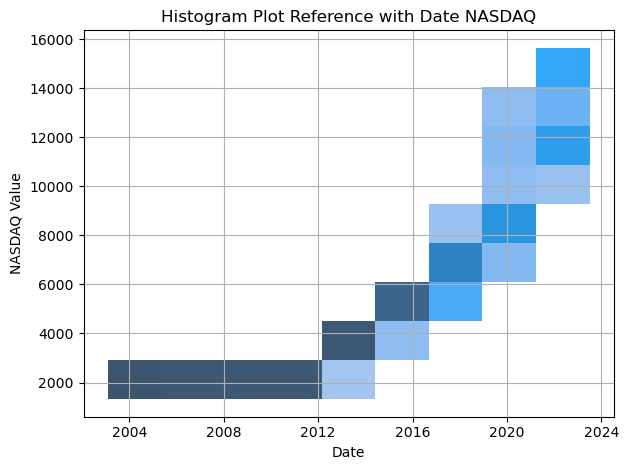

In [162]:
create_hist_plot(df_1['NASDAQ'])

In [163]:
# Aftermath of Covid Second Wave, We can clearly see that there is kind of Increse in NASDAQ 

df_1[df_1['NASDAQ']>15000]

Date  CSUSHPISA  UMCSENT  INTDSRUSM193N  MORTGAGE30US     MSPUS  \
223 2021-08-31    267.005     70.3           0.25        2.8425  423600.0   
225 2021-10-31    273.931     71.7           0.25        3.0675  433100.0   
226 2021-11-30    277.284     67.4           0.25        3.0675  433100.0   
227 2021-12-31    281.266     70.6           0.25        3.0980  433100.0   

           GDP  PALLFNFINDEXQ  RECPROUSM156N  UNRATE  EVACANTUSQ176N  MSACSR  \
223  24349.121     187.093664            0.4     5.2         15009.0     6.5   
225  24740.480     211.872594            0.2     4.5         15184.0     6.8   
226  24740.480     211.872594            0.2     4.2         15184.0     6.0   
227  24740.480     211.872594            0.4     3.9         15184.0     5.6   

     PERMIT  TLRESCONS        NASDAQ  
223  1837.0   822881.0  15259.240234  
225  1727.0   838559.0  15498.389648  
226  1775.0   862744.0  15537.690430  
227  1948.0   891046.0  15644.969727

## Some of the key and Interesting Aspect of Univaraite Analysis is that as follow

1.We have seen that there is sudden Surge in Supply Features or Decline in Demand Features in between time Span of 2007-2008 due to the reason of U.S housing Bubble Burst and Great Reccesion of 2007-2009

2.There is also changes in Recent time of hike of Price value in most recent span in last 20 Years

3.We had also seen some parameter during the Covid time in US 

## Interms of Observing the Important Scenrio happened in last Twenty years

We Need to Observe the important Event hapoended in last twenty Years 

1. The US Housing Bubble Burst 

2. The Great Recession 

3. Lehmann Brother Crisis 

(The above  all the event has happened between the span of 2007 -2009)
 
  4.Covid Wave influence on US market
  
5.Recent Recession which affect the supply and Demand of Various Commodities 

So these Event has played major role in Demand and Supply of House hold pricing in US 

## Bi-Variate Analysis of the Features 

In [164]:
df_1.columns

Index(['Date', 'CSUSHPISA', 'UMCSENT', 'INTDSRUSM193N', 'MORTGAGE30US',
       'MSPUS', 'GDP', 'PALLFNFINDEXQ', 'RECPROUSM156N', 'UNRATE',
       'EVACANTUSQ176N', 'MSACSR', 'PERMIT', 'TLRESCONS', 'NASDAQ'],
      dtype='object')

## Case_Schiller_Home_Price_Index Vs Customer_sentiment

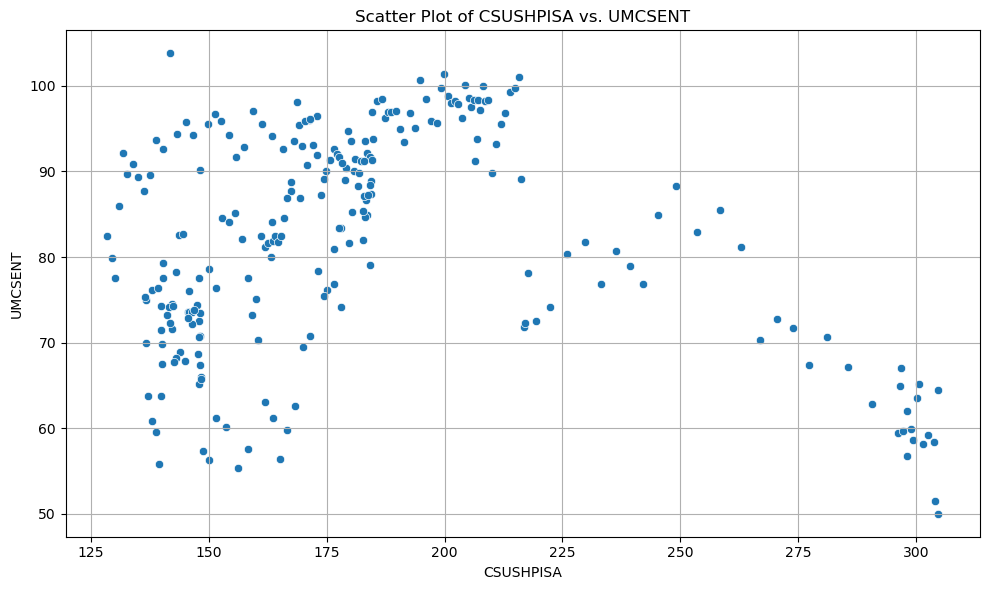

In [165]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='UMCSENT')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. UMCSENT')
plt.xlabel('CSUSHPISA')
plt.ylabel('UMCSENT')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In above,

We can verify that kind of Relation between both the Parameter- but key aspect we had observed that sentiment is low when increase in the Index 

## Case_Schiller_Home_Price_Index Vs Interest_rate-INTDSRUSM193N

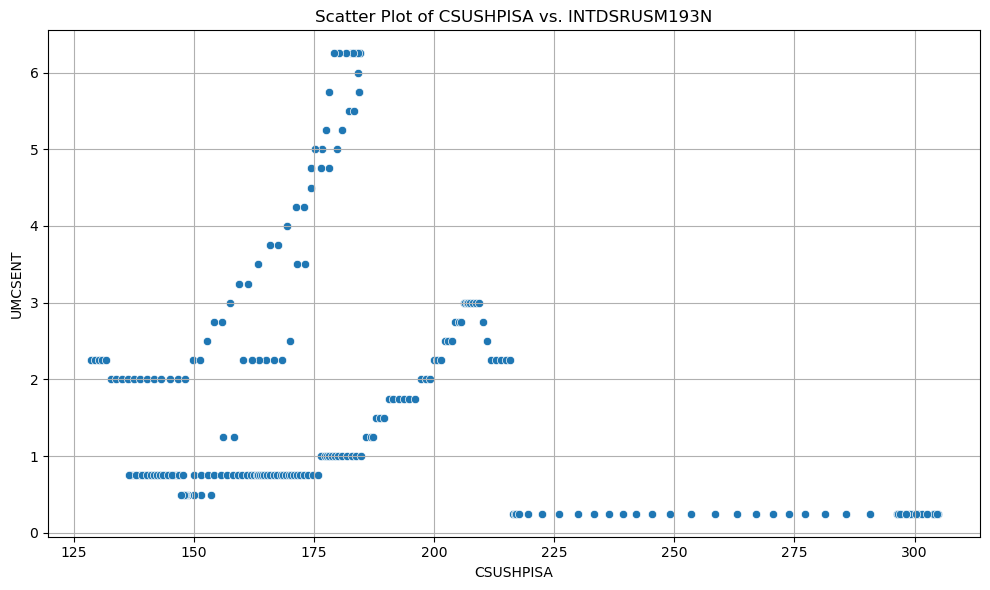

In [166]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='INTDSRUSM193N')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. INTDSRUSM193N')
plt.xlabel('CSUSHPISA')
plt.ylabel('UMCSENT')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

As in the Index, We can clearly Conclude that lower the Rate increase in CSUSHPISA value 

## Case_Schiller_Home_Price_Index Vs Mortgage_rate-MORTGAGE15US

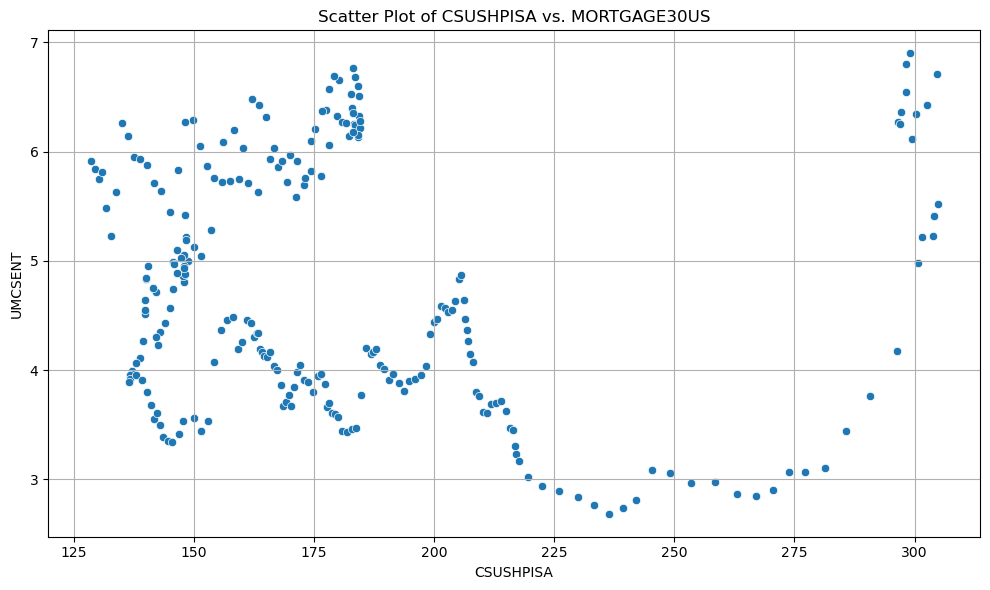

In [167]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='MORTGAGE30US')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. MORTGAGE30US')
plt.xlabel('CSUSHPISA')
plt.ylabel('UMCSENT')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Case_Schiller_Home_Price_Index Vs MSPUS

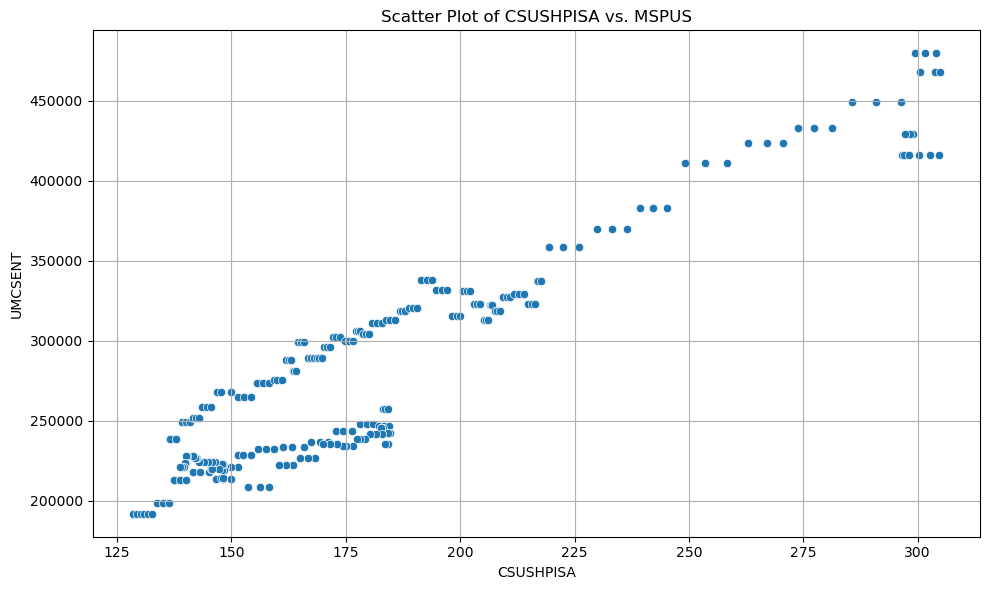

In [168]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='MSPUS')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. MSPUS')
plt.xlabel('CSUSHPISA')
plt.ylabel('UMCSENT')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [169]:
df_1.columns

Index(['Date', 'CSUSHPISA', 'UMCSENT', 'INTDSRUSM193N', 'MORTGAGE30US',
       'MSPUS', 'GDP', 'PALLFNFINDEXQ', 'RECPROUSM156N', 'UNRATE',
       'EVACANTUSQ176N', 'MSACSR', 'PERMIT', 'TLRESCONS', 'NASDAQ'],
      dtype='object')

## Case_Schiller_Home_Price_Index Vs GDP

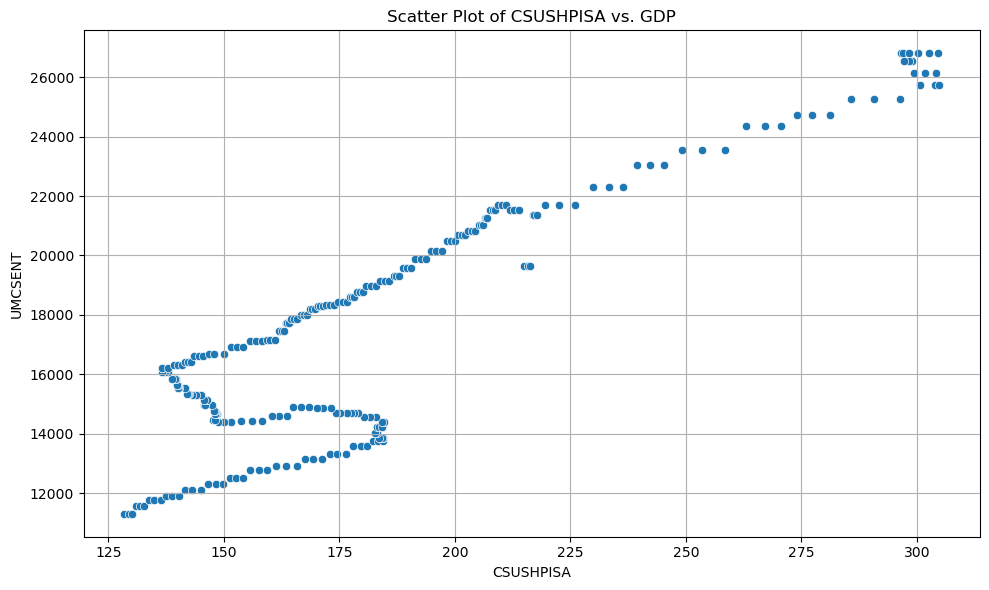

In [170]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='GDP')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. GDP')
plt.xlabel('CSUSHPISA')
plt.ylabel('UMCSENT')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Case_Schiller_Home_Price_Index Vs PALLFNFINDEXQ

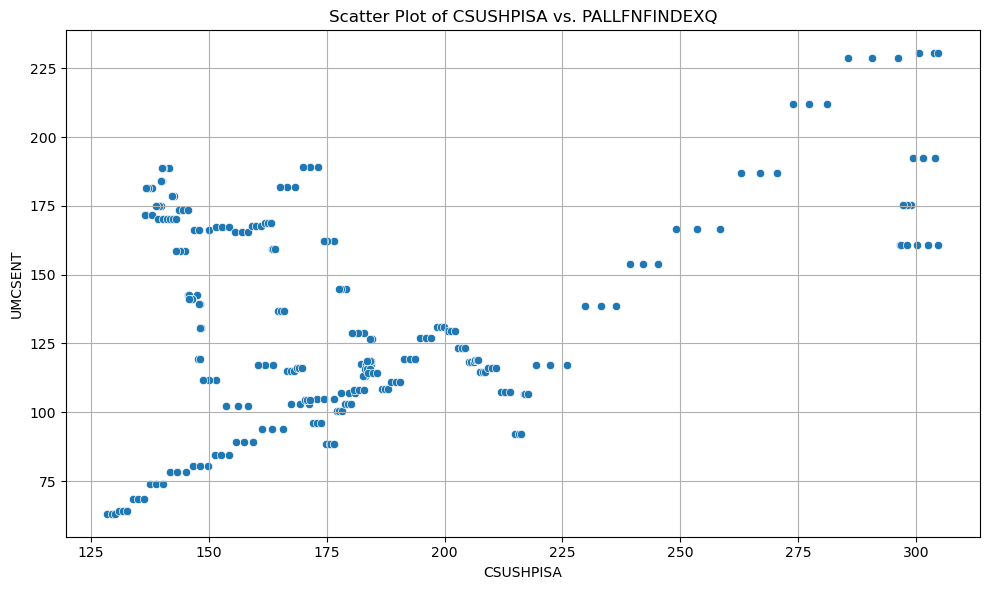

In [171]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='PALLFNFINDEXQ')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. PALLFNFINDEXQ')
plt.xlabel('CSUSHPISA')
plt.ylabel('UMCSENT')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Case_Schiller_Home_Price_Index Vs RECPROUSM156N

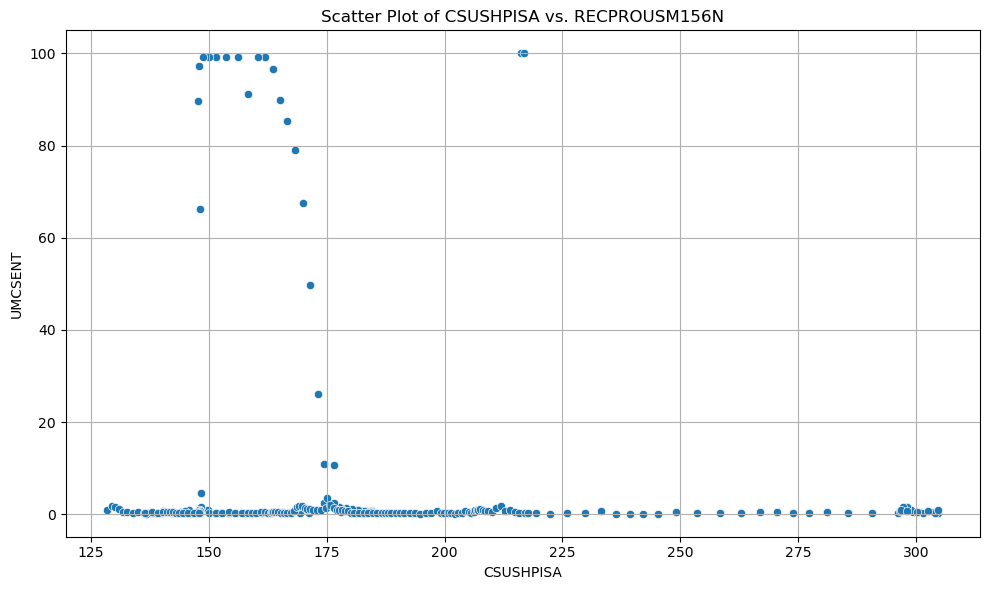

In [172]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='RECPROUSM156N')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. RECPROUSM156N')
plt.xlabel('CSUSHPISA')
plt.ylabel('UMCSENT')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Case_Schiller_Home_Price_Index Vs UNRATE

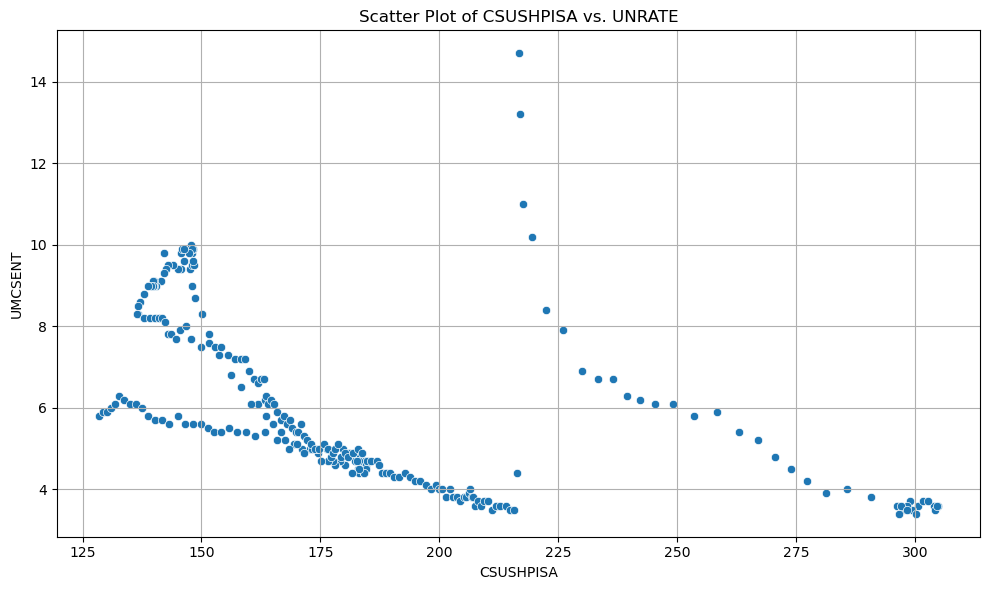

In [173]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='UNRATE')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. UNRATE')
plt.xlabel('CSUSHPISA')
plt.ylabel('UMCSENT')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Case_Schiller_Home_Price_Index Vs EVACANTUSQ176N

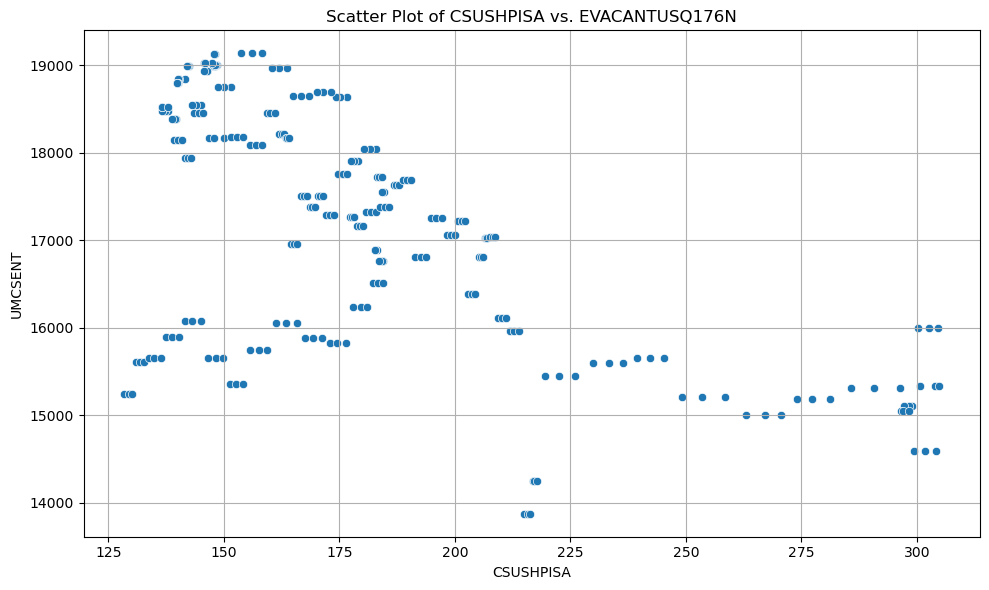

In [174]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='EVACANTUSQ176N')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. EVACANTUSQ176N')
plt.xlabel('CSUSHPISA')
plt.ylabel('UMCSENT')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Case_Schiller_Home_Price_Index Vs MSACSR

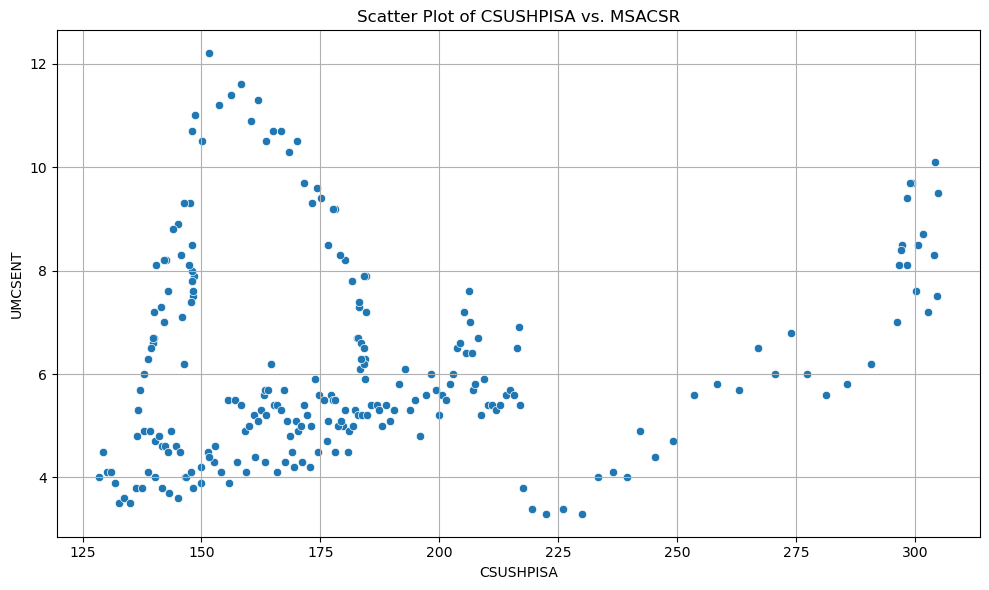

In [175]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='MSACSR')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. MSACSR')
plt.xlabel('CSUSHPISA')
plt.ylabel('UMCSENT')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Case_Schiller_Home_Price_Index Vs MSACSR

In [176]:
df.columns

Index(['CSUSHPISA', 'UMCSENT', 'INTDSRUSM193N', 'MORTGAGE30US', 'MSPUS', 'GDP',
       'PALLFNFINDEXQ', 'RECPROUSM156N', 'UNRATE', 'EVACANTUSQ176N', 'MSACSR',
       'PERMIT', 'TLRESCONS', 'NASDAQ'],
      dtype='object')

## Case_Schiller_Home_Price_Index Vs PERMIT


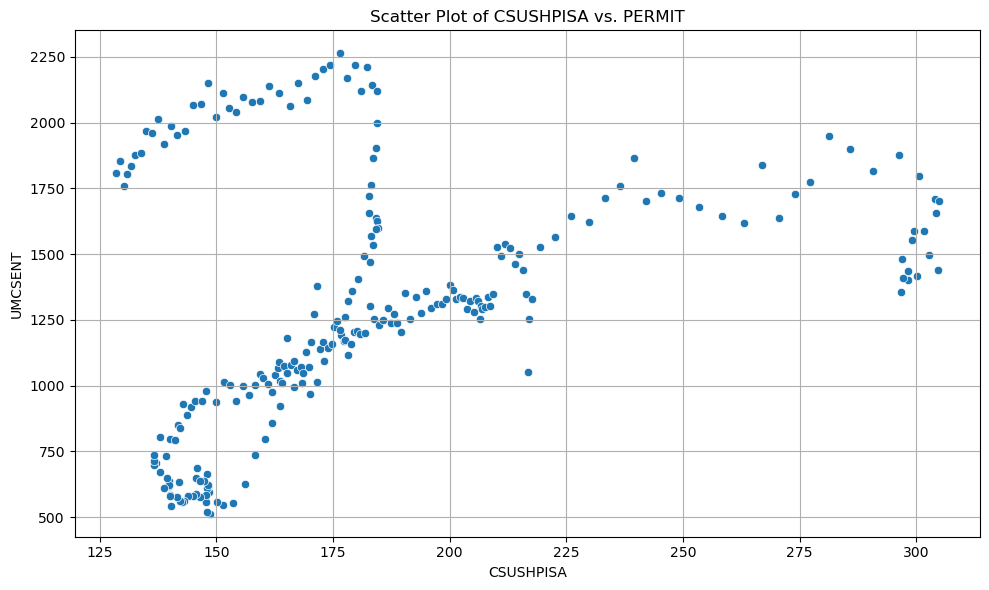

In [177]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='PERMIT')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. PERMIT')
plt.xlabel('CSUSHPISA')
plt.ylabel('UMCSENT')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Case_Schiller_Home_Price_Index Vs TLRESCONS

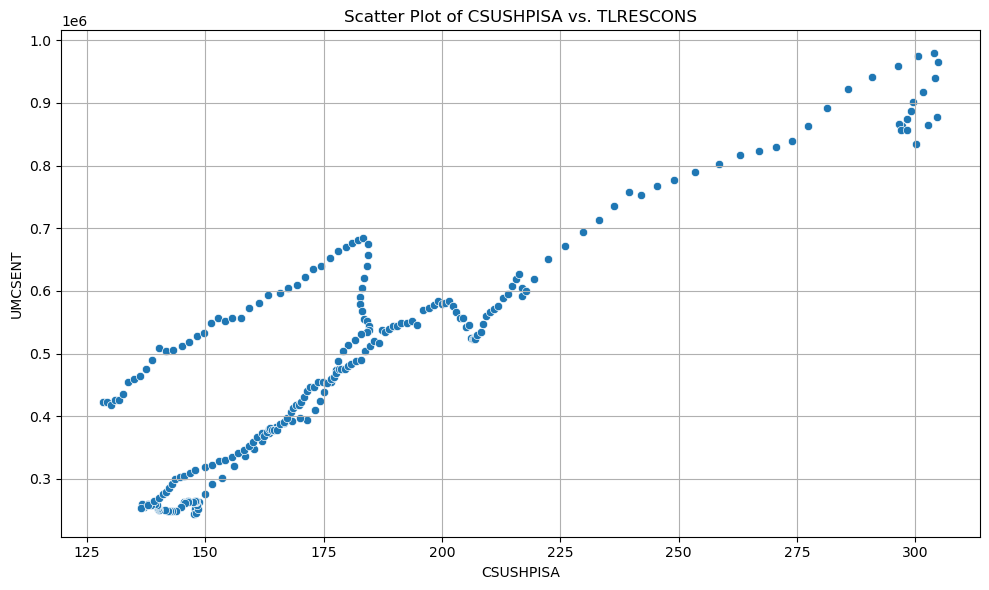

In [178]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='TLRESCONS')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. TLRESCONS')
plt.xlabel('CSUSHPISA')
plt.ylabel('UMCSENT')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Case_Schiller_Home_Price_Index Vs NASDAQ

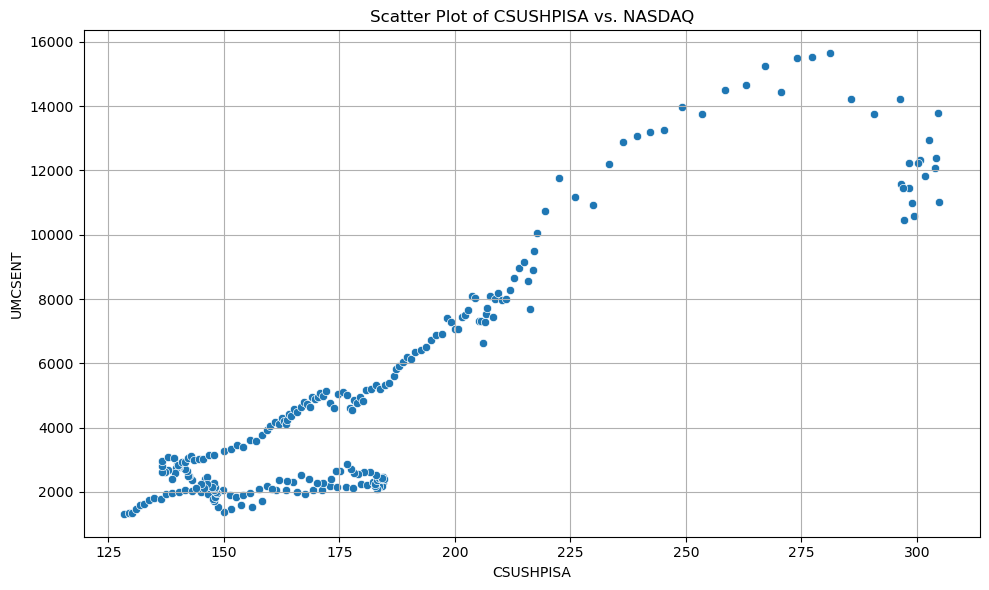

In [179]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='NASDAQ')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. NASDAQ')
plt.xlabel('CSUSHPISA')
plt.ylabel('UMCSENT')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## MultiVariate Analysis is Important Parameter in Analysing the Correlation Factor of the Data

In [180]:
correlation_matrix = df_1.corr()['CSUSHPISA']


/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_6335/3846495534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_1.corr()['CSUSHPISA']


In [181]:
correlation_matrix

CSUSHPISA         1.000000
UMCSENT          -0.178496
INTDSRUSM193N    -0.147132
MORTGAGE30US     -0.094938
MSPUS             0.933848
GDP               0.880958
PALLFNFINDEXQ     0.363461
RECPROUSM156N    -0.123792
UNRATE           -0.529731
EVACANTUSQ176N   -0.620852
MSACSR            0.162587
PERMIT            0.364176
TLRESCONS         0.894542
NASDAQ            0.906768
Name: CSUSHPISA, dtype: float64

On Above Correlation, 

We clearly see that Case_Schiller_Home_Price_Index is highly co-related with some features like NASDAQ,Construction_Spending,House_Hold rate, 

In this Particlar Scenerio, We can cleary See that Increased in 100% of Index will reflect across 90% of Increase in the features of NASDAQ,Construction Spending. 

Here though We can convice that Stock Price Movement has kind of Impact of House Holding.At the same time, Construction Increasing if Index gets Increased.

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_6335/3111886623.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_1.corr()


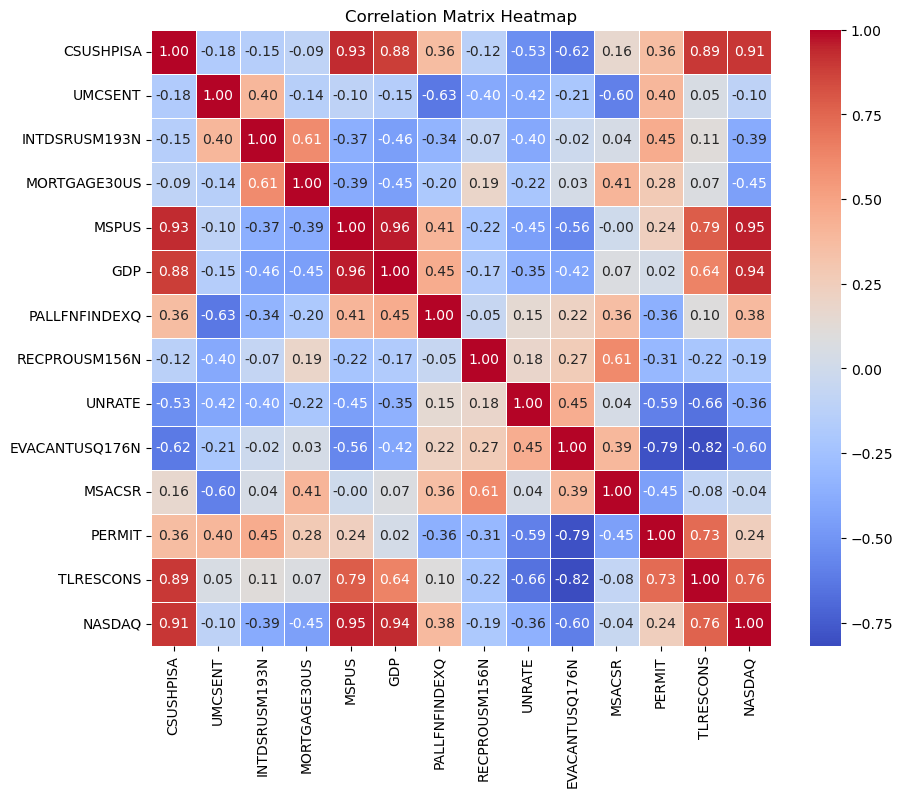

In [182]:
correlation_matrix = df_1.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

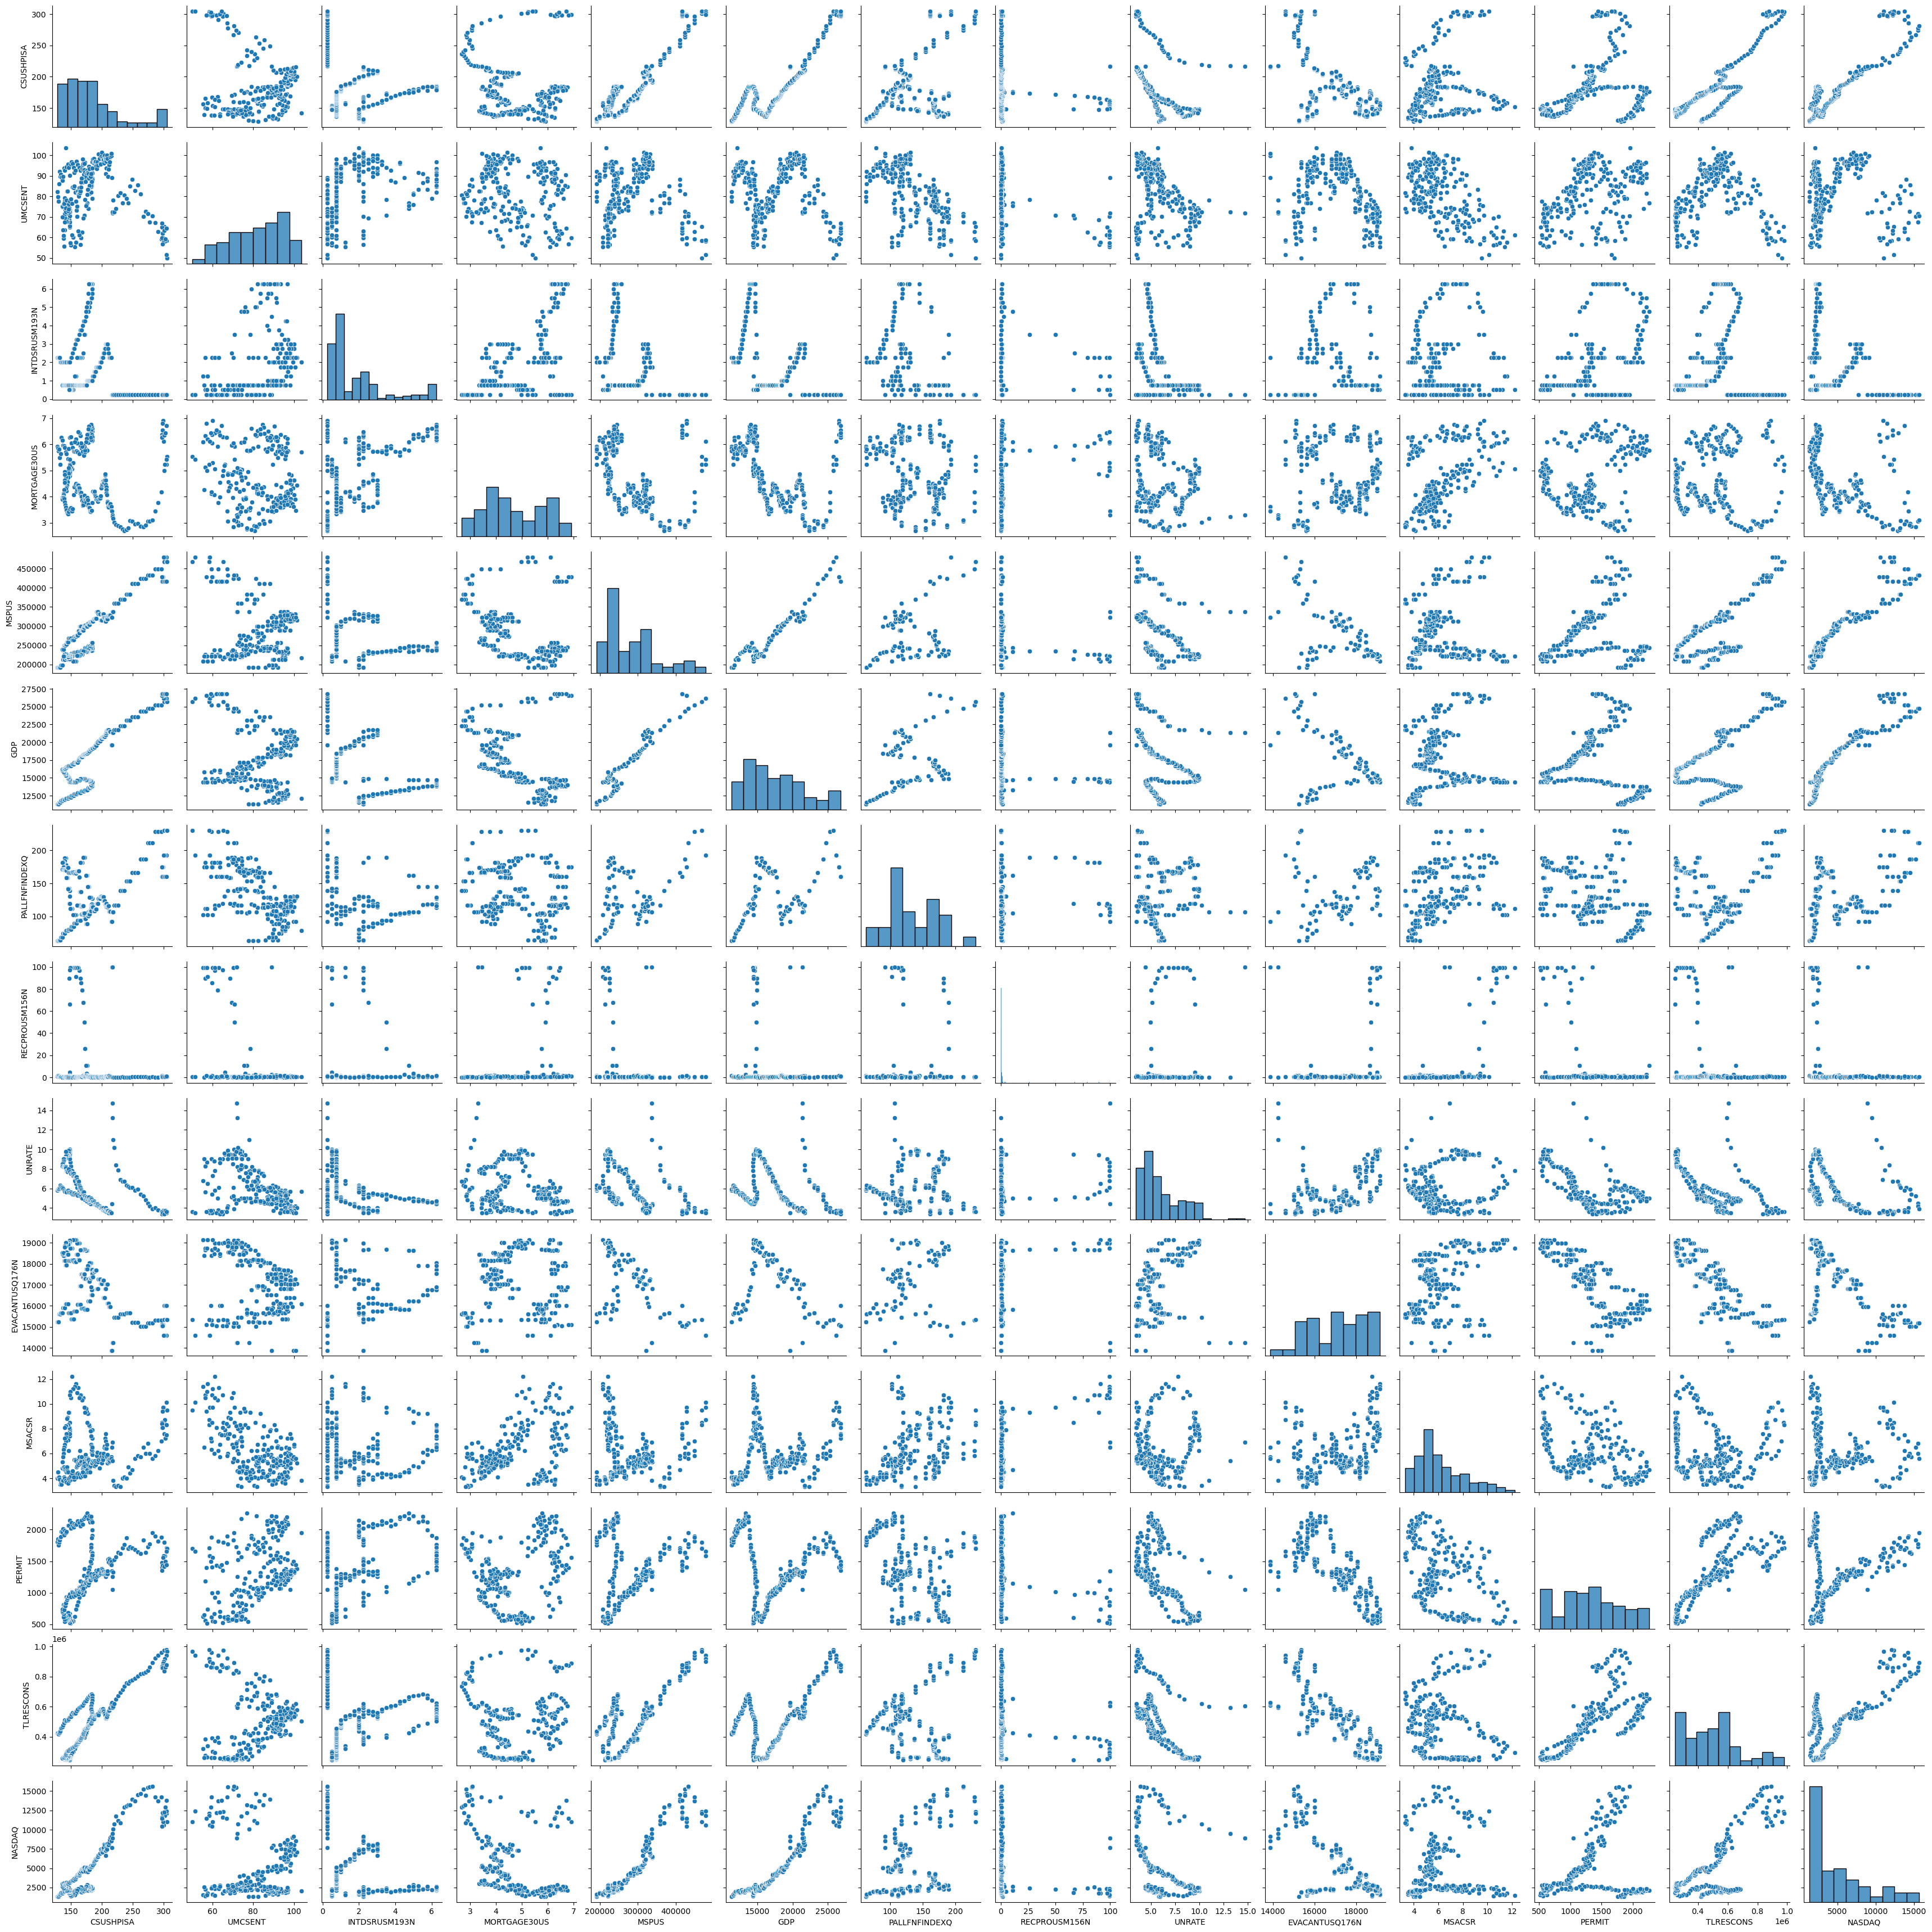

In [183]:
sns.pairplot(df_1)

In [184]:
df_main=df.copy()

## Scaling 

In [185]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)


In [186]:
df.shape

(246, 14)

In [187]:
columns_to_scale = ['CSUSHPISA', 'UMCSENT', 'INTDSRUSM193N', 'MORTGAGE30US', 'MSPUS', 'GDP',
                    'PALLFNFINDEXQ', 'RECPROUSM156N', 'UNRATE', 'EVACANTUSQ176N', 'MSACSR',
                    'PERMIT', 'TLRESCONS', 'NASDAQ']

In [188]:
df=pd.DataFrame(df,columns=columns_to_scale)

In [189]:
df_main

CSUSHPISA  UMCSENT  INTDSRUSM193N  MORTGAGE30US     MSPUS        GDP  \
0      128.460     82.4           2.25        5.9160  191800.0  11312.766   
1      129.355     79.9           2.25        5.8425  191800.0  11312.766   
2      130.147     77.6           2.25        5.7450  191800.0  11312.766   
3      130.884     86.0           2.25        5.8125  191900.0  11566.669   
4      131.734     92.1           2.25        5.4840  191900.0  11566.669   
..         ...      ...            ...           ...       ...        ...   
241    296.958     67.0           0.25        6.2575  416100.0  26798.605   
242    298.210     62.0           0.25        6.5440  416100.0  26798.605   
243    300.214     63.5           0.25        6.3425  416100.0  26798.605   
244    302.657     59.2           0.25        6.4250  416100.0  26798.605   
245    304.635     64.4           0.25        6.7140  416100.0  26798.605   

     PALLFNFINDEXQ  RECPROUSM156N  UNRATE  EVACANTUSQ176N  MSACSR  PERMIT  \
0        63.112509            1.0     5.8     15244.00000     4.0  1808.0   
1        63.112509            1.7     5.9     15244.00000     4.5  1854.0   
2        63.112509            1.5     5.9     15244.00000     4.1  1757.0   
3        64.076433            1.1     6.0     15614.00000     4.1  1803.0   
4        64.076433            0.5     6.1     15614.00000     3.9  1835.0   
..             ...            ...     ...             ...     ...     ...   
241     160.631240            0.8     3.6     15049.00000     8.4  1482.0   
242     160.631240            0.7     3.5     15049.00000     8.1  1437.0   
243     160.631240            0.5     3.4     16000.63124     7.6  1417.0   
244     160.631240            0.6     3.7     16000.63124     7.2  1496.0   
245     160.631240            1.0     3.6     16000.63124     7.5  1441.0   

     TLRESCONS        NASDAQ  
0     423049.0   1320.910034  
1     422705.0   1337.520020  
2     418232.0   1341.170044  
3     425493.0   1464.310059  
4     426270.0   1595.910034  
..         ...           ...  
241   857211.0  11455.540039  
242   856947.0  12221.910156  
243   834713.0  12226.580078  
244   864027.0  12935.290039  
245   876684.0  13787.919922  

[246 rows x 14 columns]

In [190]:
df

CSUSHPISA   UMCSENT  INTDSRUSM193N  MORTGAGE30US     MSPUS       GDP  \
0     0.000000  0.602230       0.333333      0.766603  0.000000  0.000000   
1     0.005075  0.555762       0.333333      0.749170  0.000000  0.000000   
2     0.009566  0.513011       0.333333      0.726044  0.000000  0.000000   
3     0.013745  0.669145       0.333333      0.742054  0.000348  0.016396   
4     0.018565  0.782528       0.333333      0.664137  0.000348  0.016396   
..         ...       ...            ...           ...       ...       ...   
241   0.955437  0.315985       0.000000      0.847604  0.779632  1.000000   
242   0.962536  0.223048       0.000000      0.915560  0.779632  1.000000   
243   0.973900  0.250929       0.000000      0.867766  0.779632  1.000000   
244   0.987752  0.171004       0.000000      0.887334  0.779632  1.000000   
245   0.998968  0.267658       0.000000      0.955882  0.779632  1.000000   

     PALLFNFINDEXQ  RECPROUSM156N    UNRATE  EVACANTUSQ176N    MSACSR  \
0         0.000000       0.009009  0.212389        0.260027  0.078652   
1         0.000000       0.016016  0.221239        0.260027  0.134831   
2         0.000000       0.014014  0.221239        0.260027  0.089888   
3         0.005760       0.010010  0.230088        0.330355  0.089888   
4         0.005760       0.004004  0.238938        0.330355  0.067416   
..             ...            ...       ...             ...       ...   
241       0.582728       0.007007  0.017699        0.222961  0.573034   
242       0.582728       0.006006  0.008850        0.222961  0.539326   
243       0.582728       0.004004  0.000000        0.403846  0.483146   
244       0.582728       0.005005  0.026549        0.403846  0.438202   
245       0.582728       0.009009  0.017699        0.403846  0.471910   

       PERMIT  TLRESCONS    NASDAQ  
0    0.740000   0.243179  0.000000  
1    0.766286   0.242710  0.001160  
2    0.710857   0.236622  0.001414  
3    0.737143   0.246505  0.010011  
4    0.755429   0.247563  0.019198  
..        ...        ...       ...  
241  0.553714   0.834161  0.707525  
242  0.528000   0.833801  0.761027  
243  0.516571   0.803536  0.761353  
244  0.561714   0.843439  0.810830  
245  0.530286   0.860667  0.870355  

[246 rows x 14 columns]

In [191]:
X=df.drop('CSUSHPISA',axis=1)
y=df['CSUSHPISA']

## Model Building & Evaluation

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=21)

In [194]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "AdaBoost": AdaBoostRegressor(),
        "Gradient Boosting": GradientBoostingRegressor()
    }

    results = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate the model
        train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
        test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)

        results[model_name] = {
            "Train RMSE": train_rmse,
            "Test RMSE": test_rmse,
            "Train R2 Score": r2_train,
            "Test R2 Score": r2_test
        }

    return results

In [195]:
train_and_evaluate_models(X_train, y_train, X_test, y_test)

{'Linear Regression': {'Train RMSE': 0.018687862073131212,
  'Test RMSE': 0.018219020181396324,
  'Train R2 Score': 0.9943820424317434,
  'Test R2 Score': 0.9956980416566139},
 'Lasso': {'Train RMSE': 0.24932762076869852,
  'Test RMSE': 0.2849625335798091,
  'Train R2 Score': 0.0,
  'Test R2 Score': -0.052426302929816204},
 'Ridge': {'Train RMSE': 0.02310693264933546,
  'Test RMSE': 0.024342170824015182,
  'Train R2 Score': 0.9914109760950138,
  'Test R2 Score': 0.9923204675736889},
 'Decision Tree': {'Train RMSE': 0.0,
  'Test RMSE': 0.012541412747669954,
  'Train R2 Score': 1.0,
  'Test R2 Score': 0.9979615076358445},
 'Random Forest': {'Train RMSE': 0.00507622978104815,
  'Test RMSE': 0.011034170558514349,
  'Train R2 Score': 0.9995854835598018,
  'Test R2 Score': 0.9984220415904035},
 'AdaBoost': {'Train RMSE': 0.022821175513752134,
  'Test RMSE': 0.021578081305700506,
  'Train R2 Score': 0.9916220987579112,
  'Test R2 Score': 0.9939654926965713},
 'Gradient Boosting': {'Train RMSE

In [196]:
results_dict = {
    'Linear Regression': {'Train RMSE': 0.018687862073131212, 'Test RMSE': 0.018219020181396324, 'Train R2 Score': 0.9943820424317434, 'Test R2 Score': 0.9956980416566139},
    'Lasso': {'Train RMSE': 0.24932762076869852, 'Test RMSE': 0.2849625335798091, 'Train R2 Score': 0.0, 'Test R2 Score': -0.052426302929816204},
    'Ridge': {'Train RMSE': 0.02310693264933546, 'Test RMSE': 0.024342170824015182, 'Train R2 Score': 0.9914109760950138, 'Test R2 Score': 0.9923204675736889},
    'Decision Tree': {'Train RMSE': 0.0, 'Test RMSE': 0.014739707152239944, 'Train R2 Score': 1.0, 'Test R2 Score': 0.9971842513988617},
    'Random Forest': {'Train RMSE': 0.004929338510109418, 'Test RMSE': 0.01102068673996702, 'Train R2 Score': 0.9996091262539184, 'Test R2 Score': 0.9984258957821632},
    'AdaBoost': {'Train RMSE': 0.022928065969459406, 'Test RMSE': 0.023147281616116597, 'Train R2 Score': 0.9915434336684296, 'Test R2 Score': 0.9930558969400949},
    'Gradient Boosting': {'Train RMSE': 0.004046343136217778, 'Test RMSE': 0.011584995400041775, 'Train R2 Score': 0.9997366188848172, 'Test R2 Score': 0.9982605662264369}
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results_dict)

# Transpose the DataFrame for a better view
results_df = results_df.transpose()

In [197]:
results_df

Train RMSE  Test RMSE  Train R2 Score  Test R2 Score
Linear Regression    0.018688   0.018219        0.994382       0.995698
Lasso                0.249328   0.284963        0.000000      -0.052426
Ridge                0.023107   0.024342        0.991411       0.992320
Decision Tree        0.000000   0.014740        1.000000       0.997184
Random Forest        0.004929   0.011021        0.999609       0.998426
AdaBoost             0.022928   0.023147        0.991543       0.993056
Gradient Boosting    0.004046   0.011585        0.999737       0.998261

## Hyperparameter Tuning

In [198]:
## Hyperparameter Tuning for the Best Model,

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [199]:
rf_regressor = RandomForestRegressor(random_state=42)

# Create GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train) 

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [200]:
# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Get the best estimator (model)
best_rf_model = grid_search.best_estimator_

# Use the best model for predictions on your test data
y_test_pred = best_rf_model.predict(X_test)  # X_test is your test data

# Calculate evaluation metrics
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Test RMSE:", test_rmse)
print("Test R2 Score:", test_r2)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test RMSE: 0.011037735502351433
Test R2 Score: 0.9984210218052189


In [201]:
model=RandomForestRegressor()

In [202]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [203]:
model.score(X_train,y_train)

0.9995959026374047

In [204]:
model.score(X_test,y_test)

0.9984974828530674

In [205]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
        
r2_test = r2_score(y_test, y_test_pred)

In [206]:
train_rmse

0.005012026986670698

In [207]:
test_rmse

0.01076717161030386

In [208]:
r2_test

0.9984974828530674

## Prediction Insights

Based on Above We can Clarifies, that with and Without Hyper parameter we are getting out the Best Possible Model as Randoonm Forest. The Difference is that increase in n-estimate can increase the Performance. But We can still go with n-estimates of 100 for the Best Model Building 

## Now our Task is find out the best and most Important Features 

In [209]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_5_features = importance_df.head(5)

top_5_features


Feature  Importance
12     NASDAQ    0.407517
11  TLRESCONS    0.176496
4         GDP    0.131710
7      UNRATE    0.109882
3       MSPUS    0.099703

In [210]:
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_5_features = importance_df.head(5)

top_5_features


Feature  Importance
12     NASDAQ    0.479200
4         GDP    0.142688
11  TLRESCONS    0.120220
7      UNRATE    0.118658
3       MSPUS    0.078878

In [211]:
importance_df

Feature  Importance
12          NASDAQ    0.479200
4              GDP    0.142688
11       TLRESCONS    0.120220
7           UNRATE    0.118658
3            MSPUS    0.078878
1    INTDSRUSM193N    0.022937
5    PALLFNFINDEXQ    0.015306
2     MORTGAGE30US    0.007607
0          UMCSENT    0.005593
9           MSACSR    0.003947
6    RECPROUSM156N    0.001927
10          PERMIT    0.001639
8   EVACANTUSQ176N    0.001398

## Analysing the Result with the other Factors -- Getting deep into the Exploration

In [212]:
correlation_matrix = df_1.corr()['CSUSHPISA']
correlation_matrix

/var/folders/w5/y4zxnb0130zgls3vnryxcytr0000gn/T/ipykernel_6335/3947326882.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_1.corr()['CSUSHPISA']


CSUSHPISA         1.000000
UMCSENT          -0.178496
INTDSRUSM193N    -0.147132
MORTGAGE30US     -0.094938
MSPUS             0.933848
GDP               0.880958
PALLFNFINDEXQ     0.363461
RECPROUSM156N    -0.123792
UNRATE           -0.529731
EVACANTUSQ176N   -0.620852
MSACSR            0.162587
PERMIT            0.364176
TLRESCONS         0.894542
NASDAQ            0.906768
Name: CSUSHPISA, dtype: float64

On Above, We can deep dive into the Parameters of top_features along with the Correlation, 
which means that 

## NASDAQ-
    
    In Nasdaq, We can easily get that the Information that when ever there is the increase in the Case_Schiller_Home_Price_Index Increase there is Increase in the atleast 90 % of NASDAQ value which Mean that the country stock market spread the same information of Index value of Case_Schiller_Home_Price_Index.

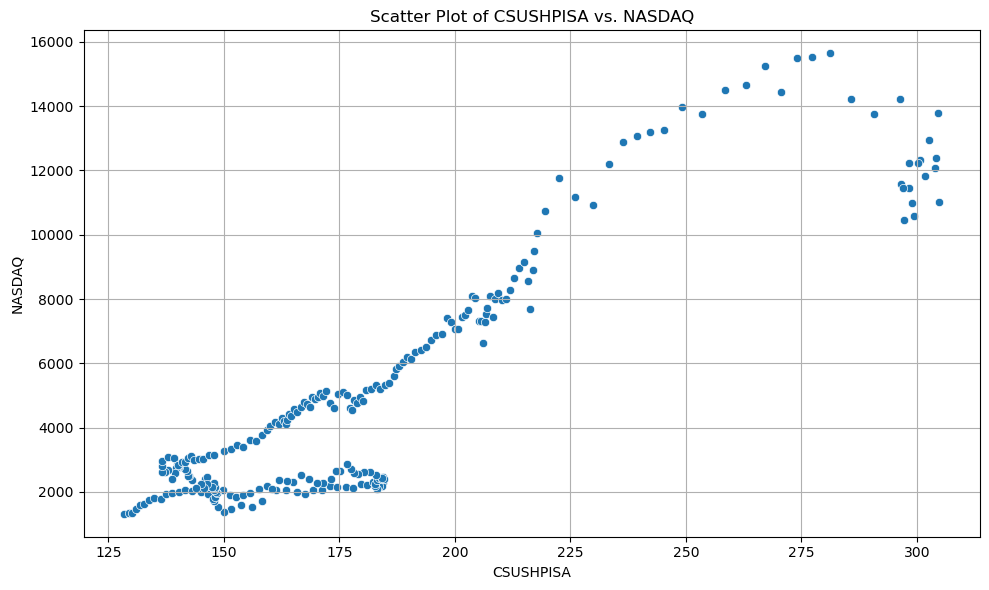

In [213]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='NASDAQ')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. NASDAQ')
plt.xlabel('CSUSHPISA')
plt.ylabel('NASDAQ')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

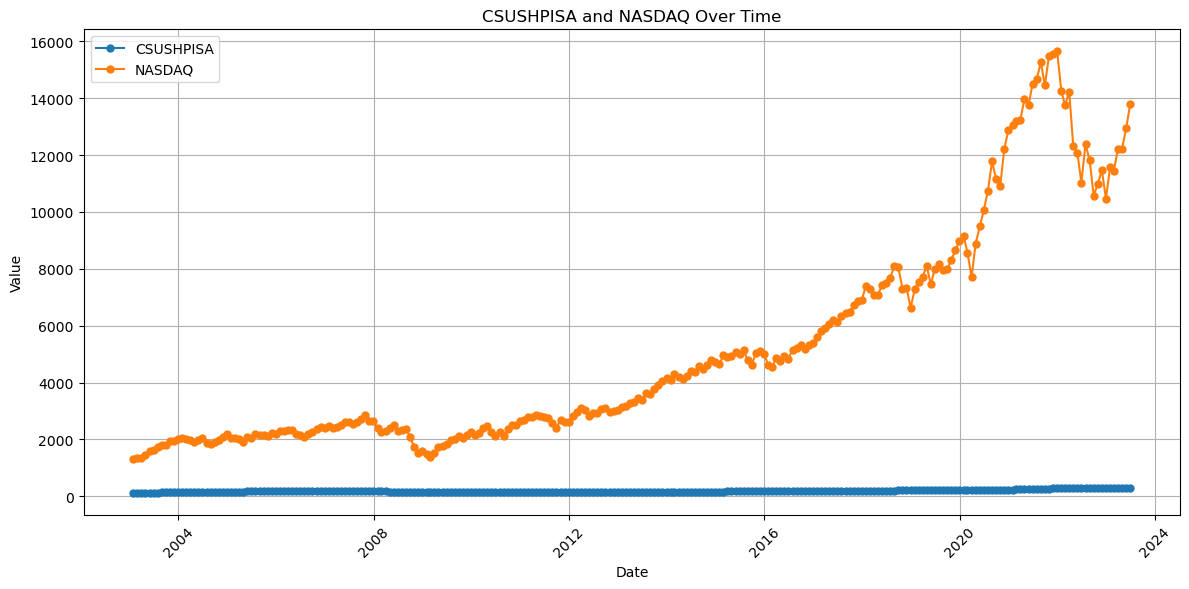

In [214]:
# Plot 'CSUSHPISA' column
plt.figure(figsize=(12, 6))
plt.plot(df_1['Date'], df_1['CSUSHPISA'], label='CSUSHPISA', marker='o', linestyle='-', markersize=5)

# Plot 'NASDAQ' column
plt.plot(df_1['Date'], df_1['NASDAQ'], label='NASDAQ', marker='o', linestyle='-', markersize=5)

plt.title('CSUSHPISA and NASDAQ Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## TLRESCONS

Construction_Spending-TLRESCONS: Aggregate Residential Construction Expenditure in the United States (Millions of Dollars, Seasonally Adjusted Annual Rate). This figure signifies the overall spending on residential construction projects.

In construction spending almost have same reaction for the Index, We can Bi-Variately analysis those features 

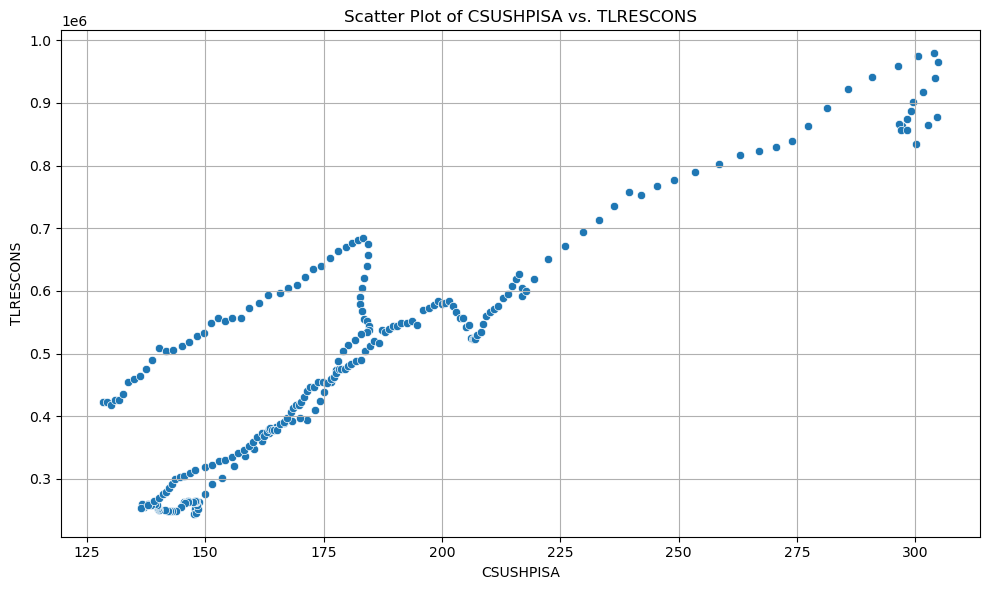

In [215]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='TLRESCONS')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. TLRESCONS')
plt.xlabel('CSUSHPISA')
plt.ylabel('TLRESCONS')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

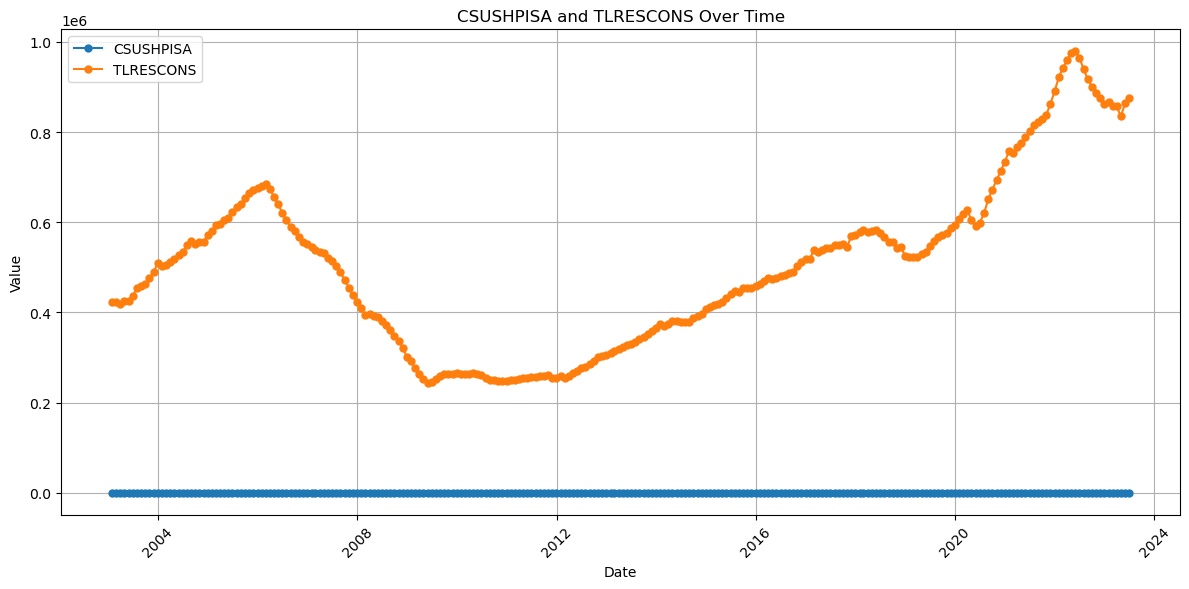

In [216]:
# Plot 'CSUSHPISA' column
plt.figure(figsize=(12, 6))
plt.plot(df_1['Date'], df_1['CSUSHPISA'], label='CSUSHPISA', marker='o', linestyle='-', markersize=5)

# Plot 'NASDAQ' column
plt.plot(df_1['Date'], df_1['TLRESCONS'], label='TLRESCONS', marker='o', linestyle='-', markersize=5)

plt.title('CSUSHPISA and TLRESCONS Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## GDP

The relationship between GDP and the Housing Price Index (HPI) is generally positive. Economic growth, reflected in rising GDP, often leads to increased housing demand and higher home prices. However, regional variations, interest rates, and market speculation can influence this relationship. During economic downturns, falling GDP may result in reduced housing demand and price fluctuations. We can see the almost same way of reaction for GDP 

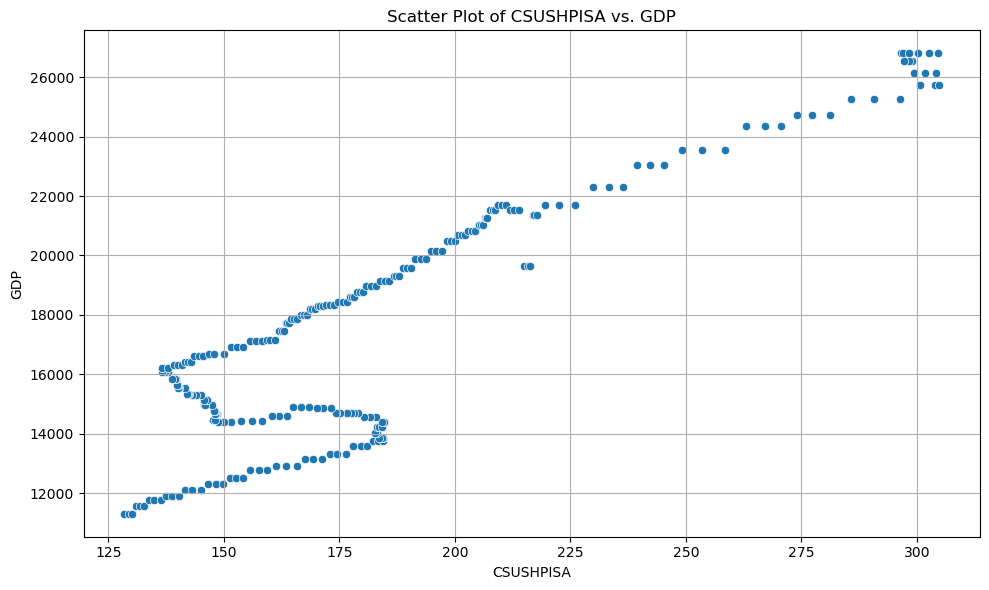

In [217]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='GDP')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. GDP')
plt.xlabel('CSUSHPISA')
plt.ylabel('GDP')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

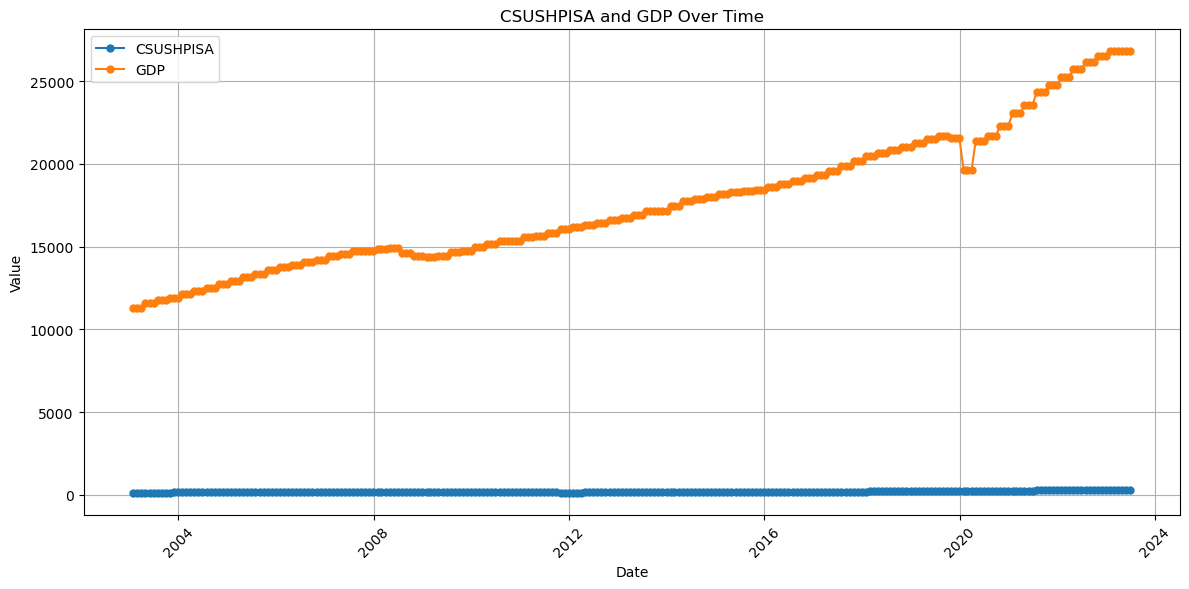

In [218]:
# Plot 'CSUSHPISA' column
plt.figure(figsize=(12, 6))
plt.plot(df_1['Date'], df_1['CSUSHPISA'], label='CSUSHPISA', marker='o', linestyle='-', markersize=5)

# Plot 'NASDAQ' column
plt.plot(df_1['Date'], df_1['GDP'], label='GDP', marker='o', linestyle='-', markersize=5)

plt.title('CSUSHPISA and GDP Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## UNRATE - Unemployment Rate-  

Unemployment Rate has an different reaction to the Index value we can gather more information about the same in Visualization.High unemployment rates can lead to a decrease in housing demand, resulting in lower Housing Price Index (HPI) values. Conversely, low unemployment rates typically indicate a stronger economy and increased housing demand, contributing to rising HPI values. The relationship between unemployment and HPI is often inversely proportional. When unemployment is high, HPI tends to decrease, while low unemployment is associated with higher HPI values. Therefore, unemployment plays a significant role in shaping the dynamics of the housing market.

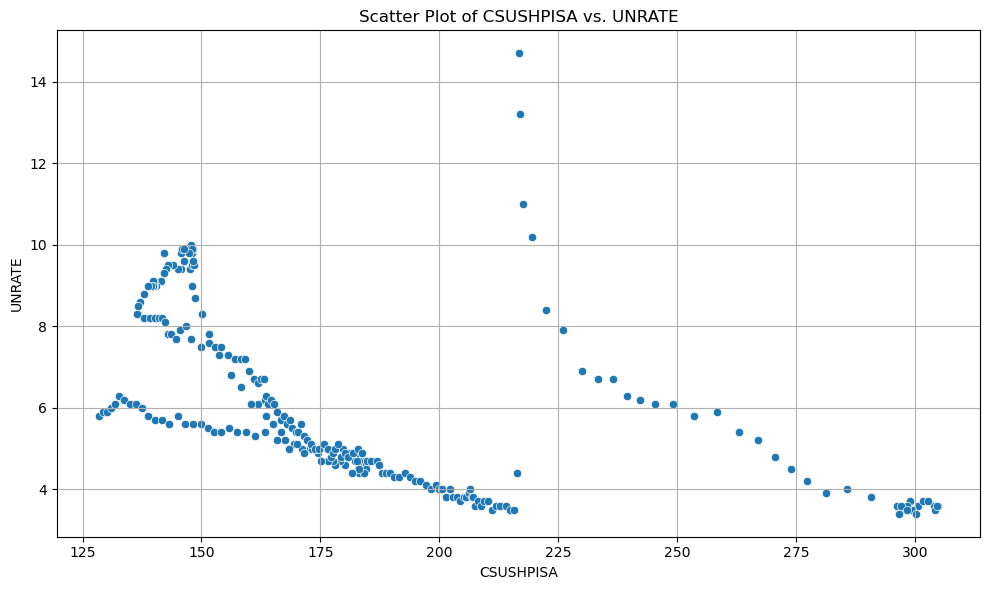

In [219]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='UNRATE')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. UNRATE')
plt.xlabel('CSUSHPISA')
plt.ylabel('UNRATE')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

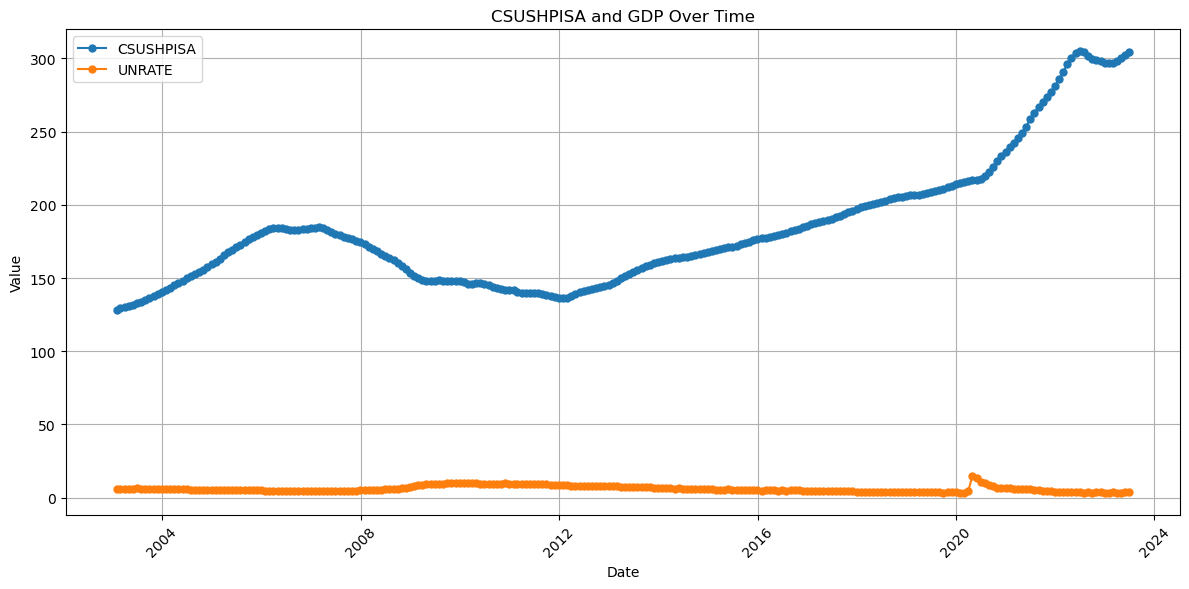

In [220]:
# Plot 'CSUSHPISA' column
plt.figure(figsize=(12, 6))
plt.plot(df_1['Date'], df_1['CSUSHPISA'], label='CSUSHPISA', marker='o', linestyle='-', markersize=5)

# Plot 'NASDAQ' column
plt.plot(df_1['Date'], df_1['UNRATE'], label='UNRATE', marker='o', linestyle='-', markersize=5)

plt.title('CSUSHPISA and GDP Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## MSPUS

House_Hold_Rate:MSPUS: Median Sales Price of Houses Sold for the United States

Another feature in determining the Index value,and one additonal feature is that it still Execute on the way of Index


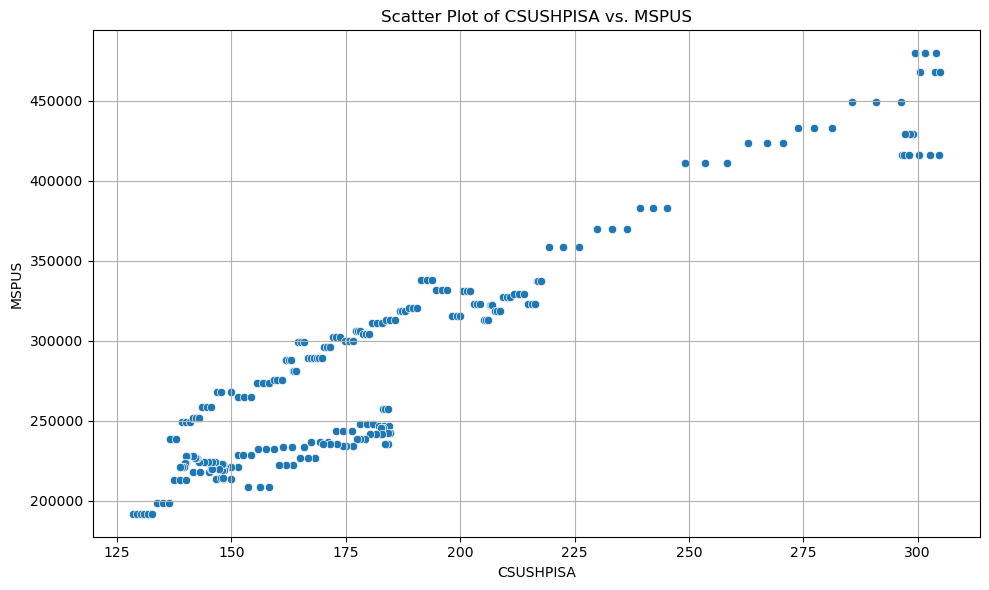

In [221]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='CSUSHPISA', y='MSPUS')

# Set titles and labels
plt.title('Scatter Plot of CSUSHPISA vs. MSPUS')
plt.xlabel('CSUSHPISA')
plt.ylabel('MSPUS')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

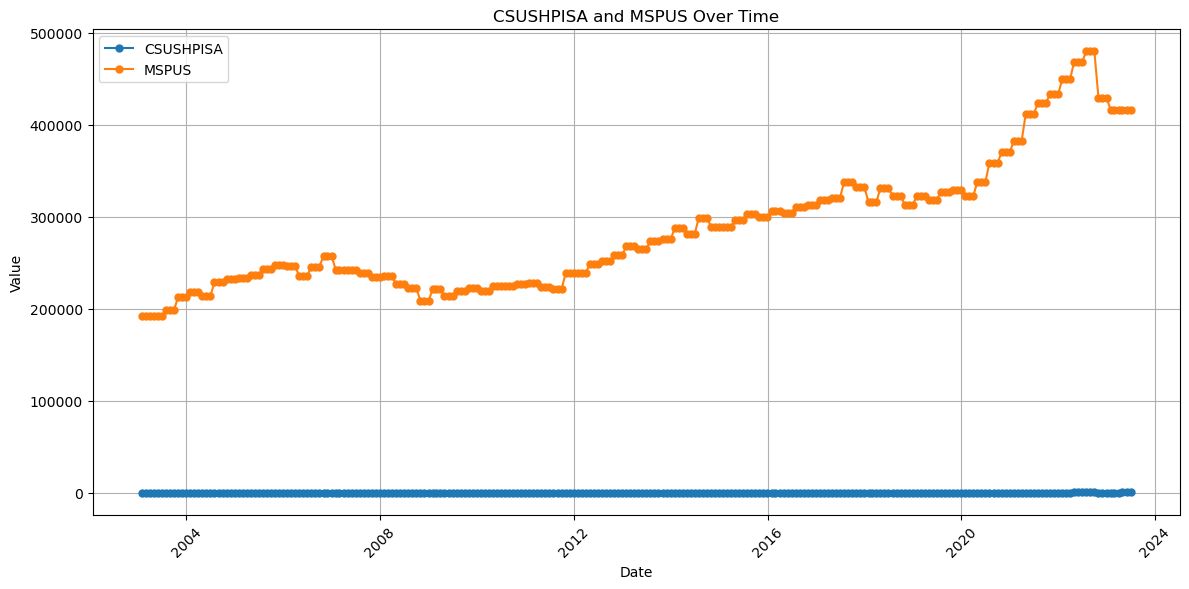

In [222]:
 #Plot 'CSUSHPISA' column
plt.figure(figsize=(12, 6))
plt.plot(df_1['Date'], df_1['CSUSHPISA'], label='CSUSHPISA', marker='o', linestyle='-', markersize=5)

# Plot 'NASDAQ' column
plt.plot(df_1['Date'], df_1['MSPUS'], label='MSPUS', marker='o', linestyle='-', markersize=5)

plt.title('CSUSHPISA and MSPUS Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Demand Factors:
Consumer Sentiment (UMCSENT): Consumer sentiment has a weak negative correlation with home prices. Lower consumer sentiment is associated with slightly lower home prices, as it can affect consumer willingness to invest in real estate.

Interest Rates (INTDSRUSM193N): Interest rates show a weak positive correlation with home prices, indicating a scaling or trailing issue. Higher interest rates are associated with lower home prices.

Gross Domestic Product (GDP): GDP exhibits a strong positive correlation with home prices. Higher GDP is strongly associated with higher home prices, suggesting a strong economic influence on the housing market

30-Year Fixed Mortgage Rate (MORTGAGE30US): Mortgage rates show a weak negative correlation with home prices, suggesting that higher mortgage rates are associated with slightly lower home prices. Rising mortgage rates can reduce home buying demand.

## Supply Factor

New Home Supply (MSACSR): There is a very weak negative association between new home supply and housing prices. An increase in the supply of new homes may have a minor negative influence on housing prices.

Authorized Housing Units (PERMIT): There is a moderately positive correlation with home values, suggesting that a greater number of authorized housing units may contribute to higher property prices. This is likely due to the impact on the supply of houses and associated materials and labor.

Residential Construction Spending (TLRESCONS): There is a strong positive correlation between construction spending on residential projects and home prices. Higher construction spending is strongly associated with higher home prices, driven by increased construction costs.

Vacant Housing Units (EVACANTUSQ176N): There is a moderate negative correlation between the number of vacant housing units and home prices. An increase in the number of vacant units may exert downward pressure on home prices as supply increases

## Economic Factors:
Gross Domestic Product (GDP): GDP exhibits a strong positive correlation with home prices. Higher GDP is strongly associated with higher home prices, suggesting a strong economic influence on the housing market.

## Market Factors:
NASDAQ: NASDAQ, as a market indicator, has a strong positive correlation with housing prices. Higher NASDAQ values are associated with higher home prices, indicating a connection between stock market performance and real estate prices.

## CONCLUSION 

Factors related to housing supply, such as authorized housing units and construction spending, play a significant role
in influencing home prices.

Demand factors, including mortgage rates and consumer sentiment, have a relatively weaker impact on home prices.

Economic factors, such as GDP, exhibit a strong positive relationship with housing prices, reflecting the impact of overall economic health on real estate markets.

The number of vacant housing units has a negative impact on housing prices, suggesting that excess supply can lead to price declines.
NASDAQ's strong positive correlation with housing prices indicates a connection between stock market performance and the real estate market.

Based on feature importance analysis, NASDAQ, GDP, and TLRESCONS appear to be the most influential factors affecting home prices.
The correlation matrix confirms the strong positive relationships between CSUSHPISA and GDP, NASDAQ, and TLRESCONS.
